In [3]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
import matplotlib as mpl
import scipy as sp
from scipy import stats
from scipy import signal
from scipy import fft
from scipy import io
from scipy import interpolate
from scipy import optimize
from scipy import linalg
from scipy import integrate
from scipy.fft import dct
from scipy.stats import binom, poisson, norm


mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{textcomp}',
    r'\usepackage{wasysym}']
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'

saveFigs = True
pathFigures = '/home/thea/MesterTesen/WrittenWork/Figures/'


import sys

sys.path.append('../../')
sys.path.append('../')

from GetCoreData_fct import GetCoreData
from BackDiffuse_LT import BackDiffuse
from Interpolation_Class import Interpolation
from HL_AnalyticThea_class import HL_Thea
from DiffusionProfiles_calculations import DiffusionLength
from transforms import transforms
from Decon import SpectralDecon
from sigmaSolver import sigma_Solver
from SignalAttenuation import Attenuation, AnnualLayerThick


def func_gaussian(x, N, mu, sigma, a):
    
    return N * norm.pdf(x, mu, sigma) + a

# Annual Layer Thickness Estimation

### ALT for entire core, all cores

In [57]:
sites = ['Crete','SiteA', 'SiteB', 'SiteD', 'SiteE', 'SiteG']

CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

dTambs = np.zeros(len(sites))
dLakis = np.zeros(len(sites))

for i in range(len(sites)):
    coreNames = CoresSpecs['CoreName']

    core_idx = coreNames[CoresSpecs['CoreName'] == sites[i]].index[0]
    CoreSpecs = CoresSpecs.iloc[core_idx]
    dTambs[i] = CoreSpecs['dTamb']
    dLakis[i] = CoreSpecs['dLaki']

In [54]:
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'


In [55]:

site = 'SiteA'

data = pd.read_csv(pathResults + site + '_ALT_FullCore_Pshift_50.csv')
lMean = data['lMean']
lStd = data['lStd']
secs = data['depth']

l_LT = np.mean(lMean[(secs >= dTambs[i]) & (secs <= dLakis[i])])

ax1.step(secs, lMean, where='mid', lw=1.4)
ax1.errorbar(secs, lMean, lStd, c='k', fmt='.', lw=1, label='Spectral integration (average)')
ax1.set(xlim=(min(secs)-0.5, max(secs)+5), xlabel='Depth [m]', ylabel='ALT [m]', title=site)
ax1.axvline(dLakis[i], lw=1, ls='--', c='k')
ax1.axvline(dTambs[i], lw=1, ls='--', c='k')
ax1.axhline(l_LT, lw=1.3, ls='--', c='b', label = f'ALT at LT: {l_LT:.2f} [m]')
ax1.legend(fontsize=16)
    
    

NameError: name 'ax1' is not defined

In [109]:
saveFigs = False

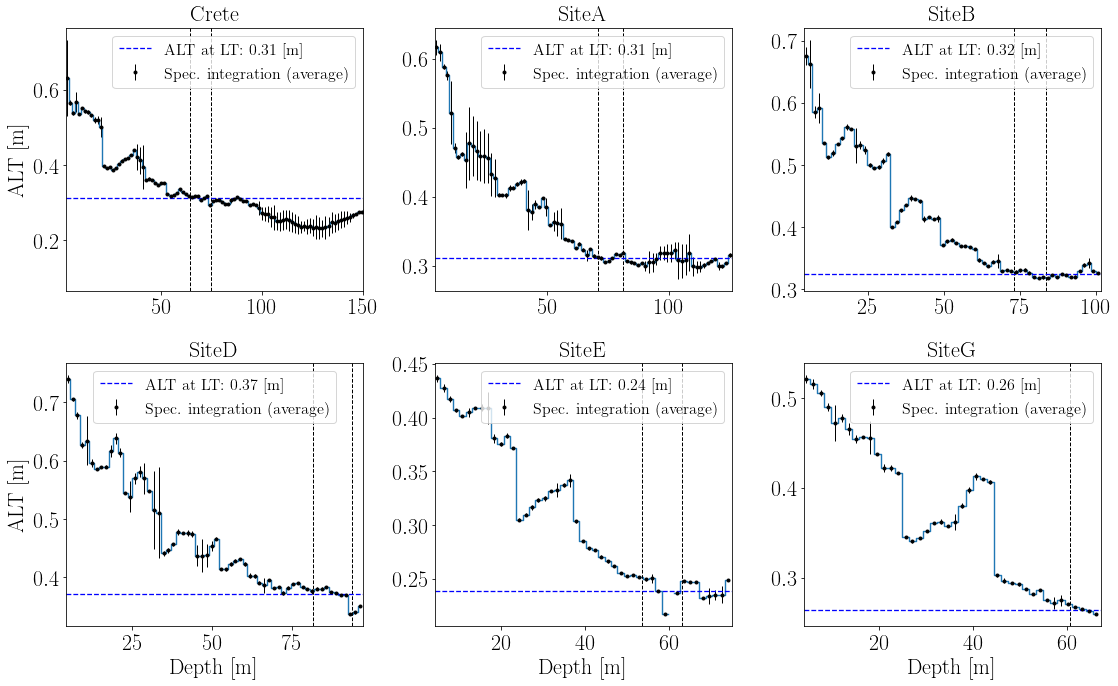

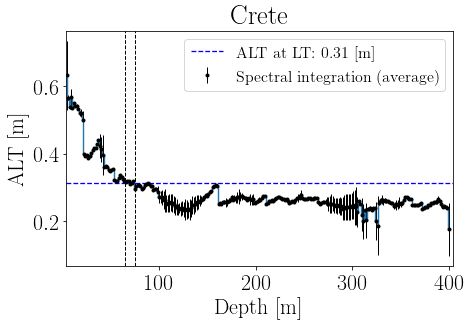

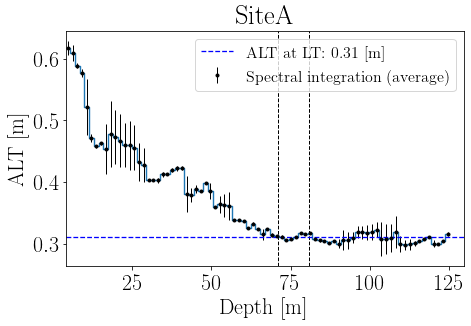

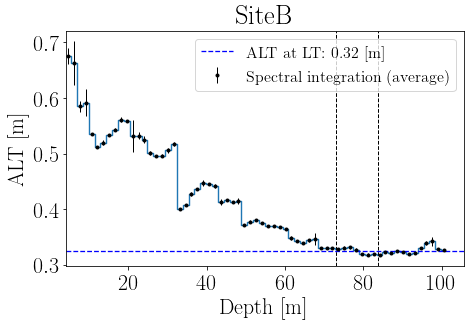

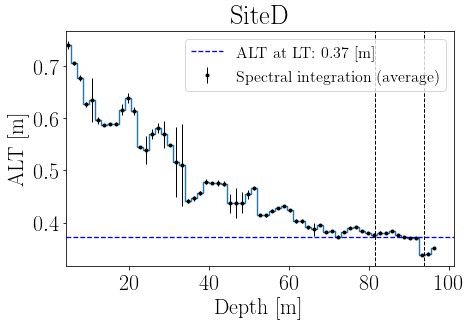

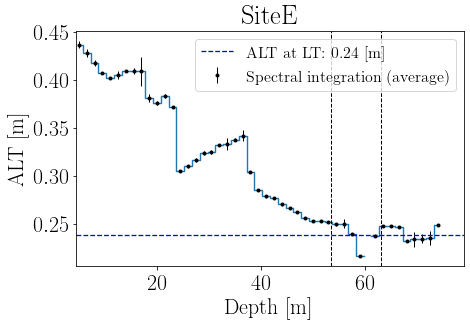

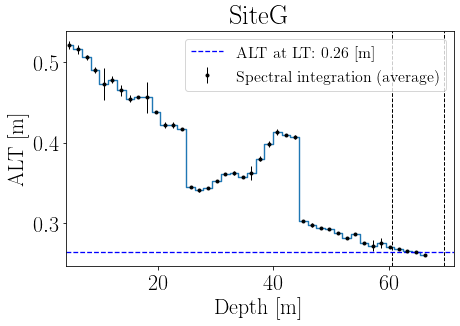

In [110]:
fig, axs = plt.subplots(2,int(np.ceil(len(sites)/2)),figsize=(16,10))#, sharey='row')
plt.close()

#figAll, axAll = 
for i,ax in zip(range(len(sites)),axs.flatten()):
    site = sites[i]

    data = pd.read_csv(pathResults + site + '_ALT_FullCore_Pshift_1_lSecs_7.csv')
    lMean = data['lMean']
    lStd = data['lStd']
    secs = data['depth']
    
    l_LT = np.mean(lMean[(secs >= dTambs[i]) & (secs <= dLakis[i])])
    
    ax.step(secs, lMean, where='mid', lw=1.4)
    ax.errorbar(secs, lMean, lStd, c='k', fmt='.', lw=1, label='Spec. integration (average)')
    ax.set_title(site, fontsize=22)
    if max(secs) < 200:
        ax.set_xlim((min(secs)-0.5, max(secs)+1))
    else:
        ax.set_xlim((min(secs)-0.5, 150))
    if i in [3,4,5]:
        ax.set_xlabel('Depth [m]')
    if i in [0,3]:
         ax.set_ylabel('ALT [m]')
    ax.axvline(dLakis[i], lw=1, ls='--', c='k')
    ax.axvline(dTambs[i], lw=1, ls='--', c='k')
    ax.axhline(l_LT, lw=1.3, ls='--', c='b', label = f'ALT at LT: {l_LT:.2f} [m]')
    ax.legend(fontsize=16)
    
    
    
#    axs.flatten()[-1].step(secs, lMean, where='mid', lw=1.6, label=site)
    #axs.flatten()[-1].errorbar(secs, lMean, lStd, c='k', fmt='.', lw=1, label='Spectral integration (average)', alpha=0.6)
    
    fig1, ax1 = plt.subplots(figsize=(7,5))
    ax1.step(secs, lMean, where='mid', lw=1.4)
    ax1.errorbar(secs, lMean, lStd, c='k', fmt='.', lw=1, label='Spectral integration (average)')
    
    ax1.set(xlim=(min(secs)-0.5, max(secs)+5), xlabel='Depth [m]', ylabel='ALT [m]', title=site)
    ax1.axvline(dLakis[i], lw=1, ls='--', c='k')
    ax1.axvline(dTambs[i], lw=1, ls='--', c='k')
    ax1.axhline(l_LT, lw=1.3, ls='--', c='b', label = f'ALT at LT: {l_LT:.2f} [m]')
    ax1.legend(fontsize=16, loc='upper right')
    fig1.tight_layout()
    
    if saveFigs:
        fig1.savefig(pathFigures+site+'_ALT.pdf',bbox_inches='tight')

#axs.flatten()[-1].set(xlim=(2,110), xlabel='Depth [m]')
#axs.flatten()[-1].legend(fontsize=16)
fig.tight_layout()

fig

In [76]:

if saveFigs:
    fig.savefig(pathFigures + 'AllCores_ALTs_wCrete.pdf', bbox_inches='tight')

### P shift vs. ALT at LT

In [82]:
saveFigs=True

In [80]:
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'
sites = ['Crete','SiteA', 'SiteB', 'SiteD', 'SiteE', 'SiteG']
colors = ['k','indigo','steelblue','darkslategrey','royalblue','midnightblue']

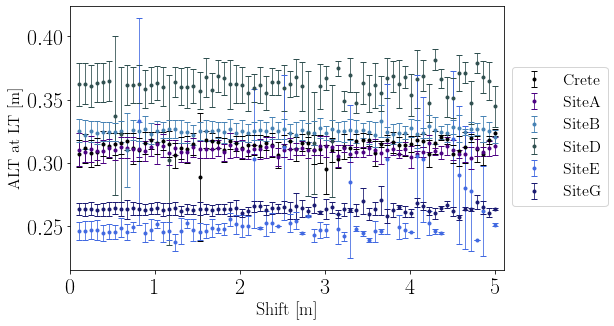

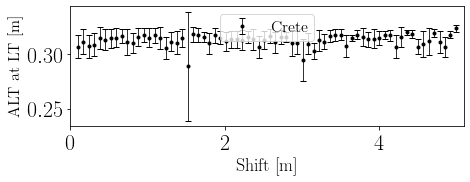

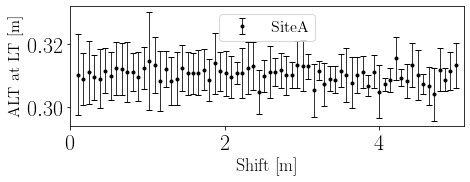

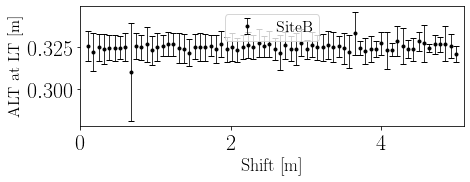

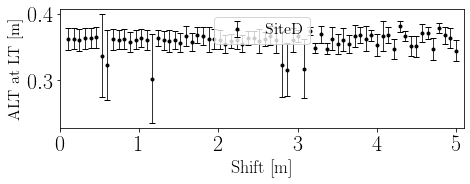

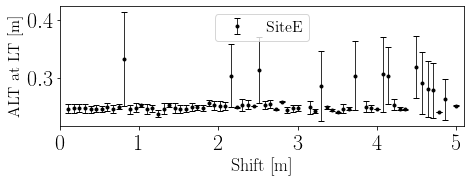

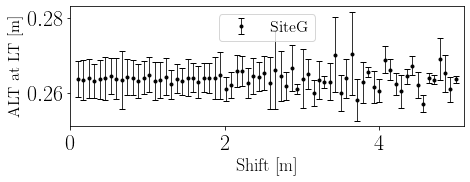

In [83]:
fig, axs = plt.subplots(int(np.ceil(len(sites)/2)),2,figsize=(15,10), sharex=True)
plt.close()

figAll, axAll = plt.subplots(figsize=(9,5))

for i,ax in zip(range(len(sites)),axs.flatten()):
    site = sites[i]
    dataALTvShifts = pd.read_csv(pathResults + site+'_ALTvShifts.csv')
    ax.errorbar(dataALTvShifts['shifts'], dataALTvShifts['lMeans'], dataALTvShifts['lStds'], color='k', lw=0.8,ls='None', marker='.', capsize=3, label=site)
    ax.legend(loc='upper center',fontsize=16)
    #axs.flatten()[-1].errorbar(dataALTvShifts['shifts'], dataALTvShifts['lMeans'], dataALTvShifts['lStds'], color=colors[i], lw=0.8,ls='None', marker='.', capsize=3, label=site)
    
    ax.set(xlim=(min(dataALTvShifts['shifts'])-0.1,max(dataALTvShifts['shifts'])+0.1))
    if i in [0,2,4]:
        ax.set(ylabel='ALT at LT [m]')
    if i in [4,5]:
        ax.set(xlabel='Shift [m]')
        
    axAll.errorbar(dataALTvShifts['shifts'], dataALTvShifts['lMeans'], dataALTvShifts['lStds'], color=colors[i], lw=0.8,ls='None', marker='.', capsize=3, label=site)
    
    fig1, ax1 = plt.subplots(figsize=(7,3))
    ax1.errorbar(dataALTvShifts['shifts'], dataALTvShifts['lMeans'], dataALTvShifts['lStds'], color='k', lw=0.8,ls='None', marker='.', capsize=3, label=site)
    ax1.legend(loc='upper center',fontsize=16)
    ax1.set(xlim=(min(dataALTvShifts['shifts'])-0.1,max(dataALTvShifts['shifts'])+0.1))
    ax1.set_ylabel('ALT at LT [m]', fontsize=16)
    ax1.set_xlabel('Shift [m]', fontsize=18)
    fig1.tight_layout()
    #if saveFigs:
    #    fig1.savefig(pathFigures+site+'_ALTvsShift.png',bbox_inches='tight')

#axs.flatten()[-1].legend(fontsize=16, loc='center right')
#axs.flatten()[-1].set(xlabel='Shift [m]')
fig.tight_layout()


axAll.legend(bbox_to_anchor=(1.0,0.8),fontsize=16)
axAll.set(xlim=(min(dataALTvShifts['shifts'])-0.1,max(dataALTvShifts['shifts'])+0.1))
axAll.set_ylabel('ALT at LT [m]', fontsize=16)
axAll.set_xlabel('Shift [m]', fontsize=18)
figAll.tight_layout()


In [84]:
if saveFigs:
    figAll.savefig(pathFigures+'AllCoresInOne_ALTvsShift_wCrete.pdf',bbox_inches='tight')

In [85]:
if saveFigs:
    fig.savefig(pathFigures+'AllCores_ALTvsShift_wCrete.pdf',bbox_inches='tight')

In [90]:
saveFigs=True

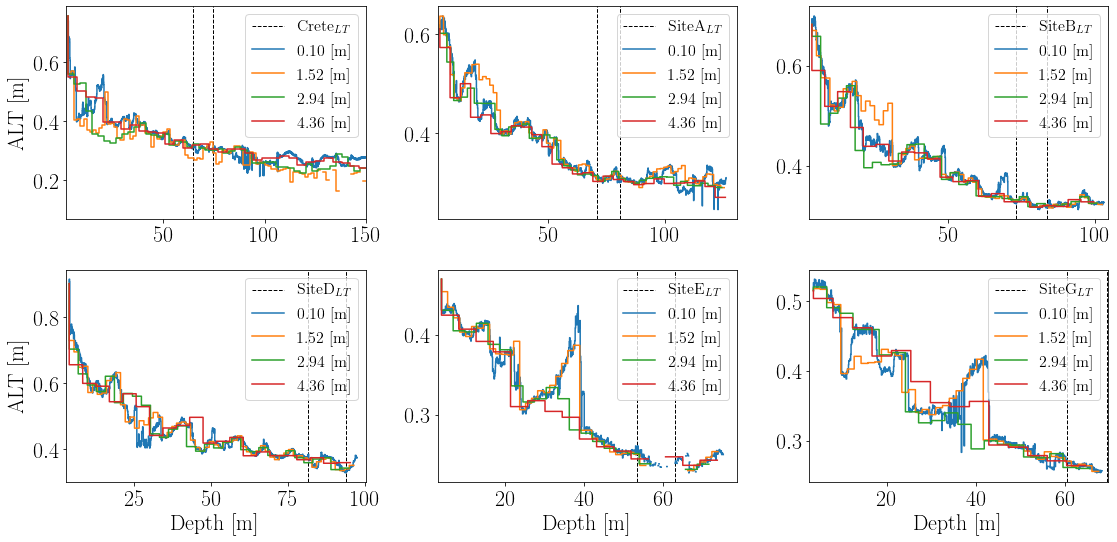

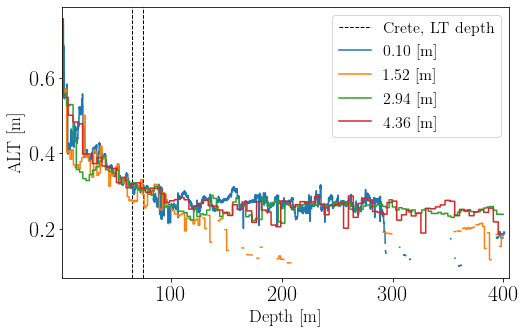

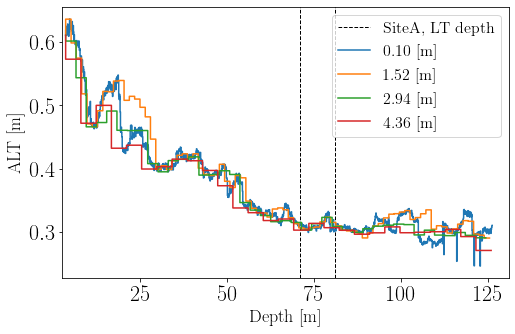

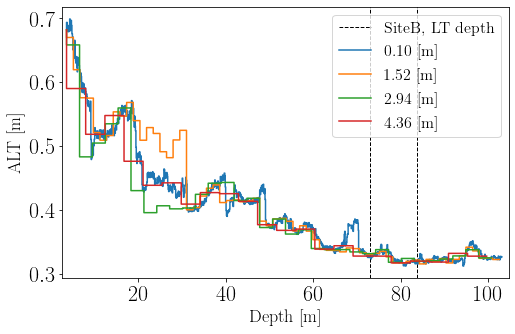

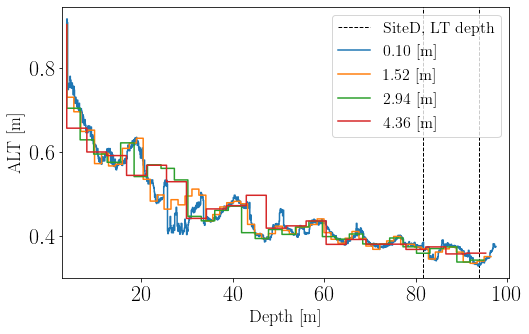

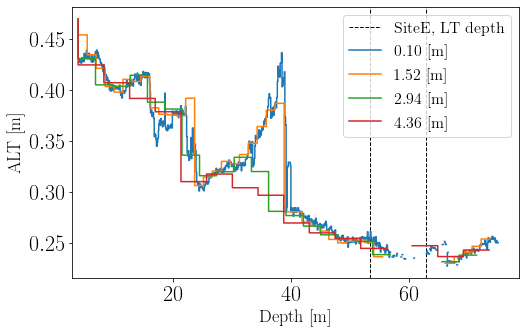

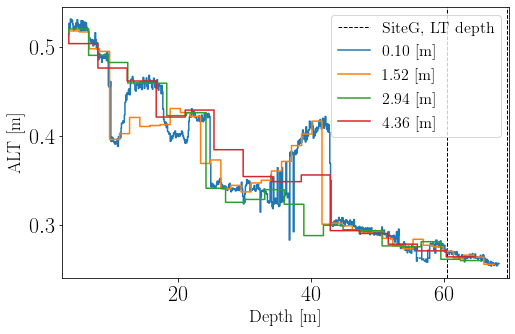

In [91]:
fig, axs = plt.subplots(2,int(np.ceil(len(sites)/2)),figsize=(16,8))
plt.close()
k = 0
for i, ax in zip(range(len(sites)),axs.flatten()):
    site = sites[i]
    dataAllShifts = pd.read_csv(pathResults+site+'_ALTvDepth_AllShifts.csv')
    ax.axvline(dLakis[i], lw=1, ls='--', c='k', label=site+'$_{LT}$')
    ax.axvline(dTambs[i], lw=1, ls='--', c='k')
    
    fig1, ax1 = plt.subplots(figsize=(8,5))
    ax1.axvline(dLakis[i], lw=1, ls='--', c='k', label=site+', LT depth')
    ax1.axvline(dTambs[i], lw=1, ls='--', c='k')
    
    for j in range(len(dataALTvShifts)):
        if j%20 == 0:
            
            secs = dataAllShifts['secs'+str(j)]
            lMean = dataAllShifts['lMean'+str(j)]
            lStd = dataAllShifts['lStd'+str(j)]
            ax.step(secs,lMean, label=f'{np.nanmean(np.diff(secs)):.2f} [m]')
            ax1.step(secs,lMean, label=f'{np.nanmean(np.diff(secs)):.2f} [m]')
            
            #axs.flatten()[-1].step(secs, lMean, c=colors[i])
    
    if max(secs)<200:
        ax.set_xlim((min(secs)-1,max(secs)+5))
    else:
        ax.set_xlim((min(secs)-1,150))
    
    ax1.set(xlim=(min(secs)-1,max(secs)+5))
    ax1.set_ylabel('ALT [m]', fontsize=18)
    ax1.set_xlabel('Depth [m]', fontsize=18)
    ax1.legend(loc='upper right', fontsize=16)
    #axs.flatten()[-1].axvline(dLakis[i], lw=1, ls='--', c=colors[i], label=site+', LT')
    #axs.flatten()[-1].axvline(dTambs[i], lw=1, ls='--', c=colors[i])
    if i in [0,3]:
        ax.set(ylabel='ALT [m]')
    if i in [3,4,5]:
        ax.set(xlabel='Depth [m]')
    ax.legend(loc='upper right', fontsize=16)
    
    if saveFigs:
        fig1.savefig(pathFigures + site + 'ALT_at_DiffShifts.pdf', bbox_inches='tight')
#axs.flatten()[-1].legend(fontsize=16, loc='upper right')
#axs.flatten()[-1].set(xlabel='Depth [m]', xlim=(2,127))
fig.tight_layout()
fig

In [92]:
if saveFigs:
    fig.savefig(pathFigures+'AllCores_ALT_at_DiffShifts_wCrete.pdf',bbox_inches='tight')

In [93]:
dataALTvLens = pd.read_csv(pathResults+site+'_ALTvLens.csv')
dataAllLens = pd.read_csv(pathResults+site+'_ALTvDepth_AllLens.csv')

In [96]:
saveFigs=True

1.0
25.0


1.0
25.0


1.0
25.0


1.0
25.0


1.0
25.0


1.0
25.0




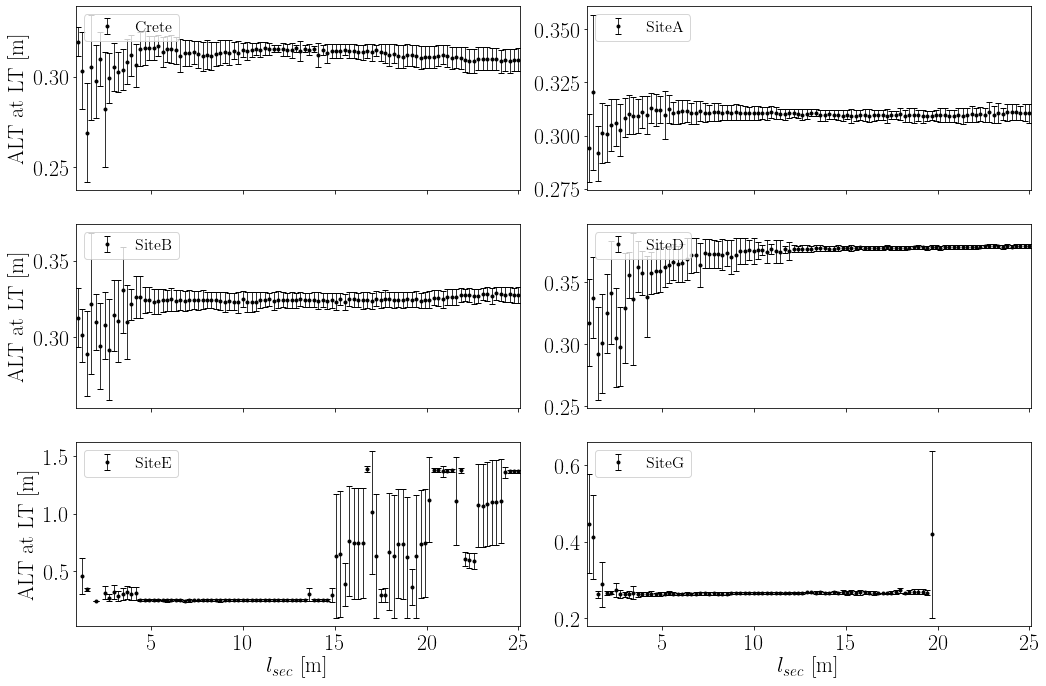

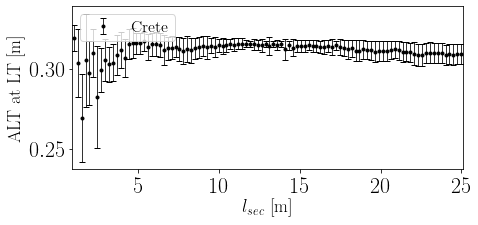

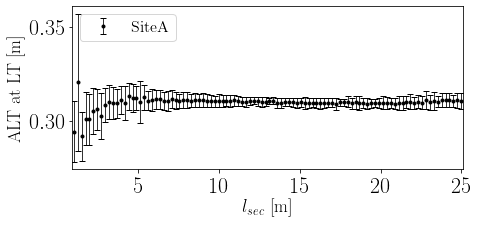

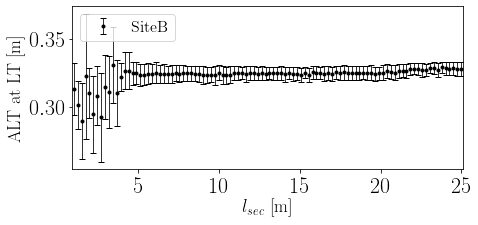

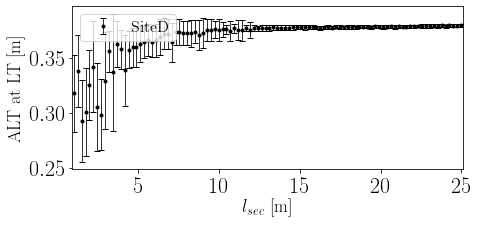

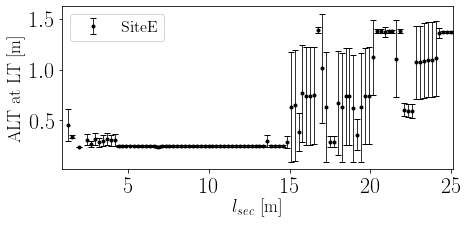

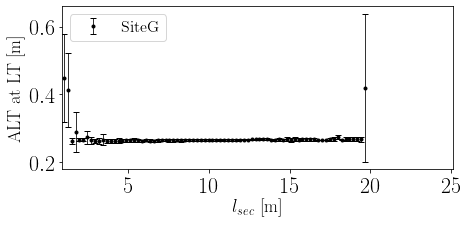

In [97]:
fig, axs = plt.subplots(int(np.ceil(len(sites)/2)),2,figsize=(15,10), sharex=True)
plt.close()

for i,ax in zip(range(len(sites)),axs.flatten()):
    site = sites[i]
    dataALTvLens = pd.read_csv(pathResults+site+'_ALTvLens.csv')
    ax.errorbar(dataALTvLens['lens'], dataALTvLens['lMeans'], dataALTvLens['lStds'], color='k', lw=0.8,ls='None', marker='.', capsize=3, label=site)
    ax.legend(loc='upper left',fontsize=16)
    #axs.flatten()[-1].errorbar(dataALTvLens['lens'], dataALTvLens['lMeans'], dataALTvLens['lStds'], color=colors[i], lw=0.8,ls='None', marker='.', capsize=3, label=site)
    ax.set(xlim=(min(dataALTvLens['lens'])-0.1,max(dataALTvLens['lens'])+0.1))
    if i in [0,2,4]:
        ax.set(ylabel='ALT at LT [m]')
    if i in [4,5]:
        ax.set(xlabel='$l_{sec}$ [m]')
    
    fig1, ax1 = plt.subplots(figsize=(7,3))
    ax1.errorbar(dataALTvLens['lens'], dataALTvLens['lMeans'], dataALTvLens['lStds'], color='k', lw=0.8,ls='None', marker='.', capsize=3, label=site)
    ax1.legend(loc='upper left',fontsize=16)
    ax1.set(xlim=(min(dataALTvLens['lens'])-0.1,max(dataALTvLens['lens'])+0.1))
    ax1.set_ylabel('ALT at LT [m]', fontsize=18)
    ax1.set_xlabel('$l_{sec}$ [m]', fontsize=18)
    if saveFigs:
        fig1.savefig(pathFigures+site+'ALTatLT_vs_lSec.pdf',bbox_inches='tight')
    print(min(dataALTvLens['lens']))
    print(max(dataALTvLens['lens']))
    print('\n')
#axs.flatten()[-1].set(xlabel='$l_{sec}$ [m]')
#axs.flatten()[-1].legend(loc='upper left', fontsize=16, ncol=2)
fig.tight_layout()
if saveFigs:
    fig.savefig(pathFigures+'AllCores_ALTatLT_vs_lSec_wCrete.pdf',bbox_inches='tight')
fig

    

In [105]:
saveFigs=True

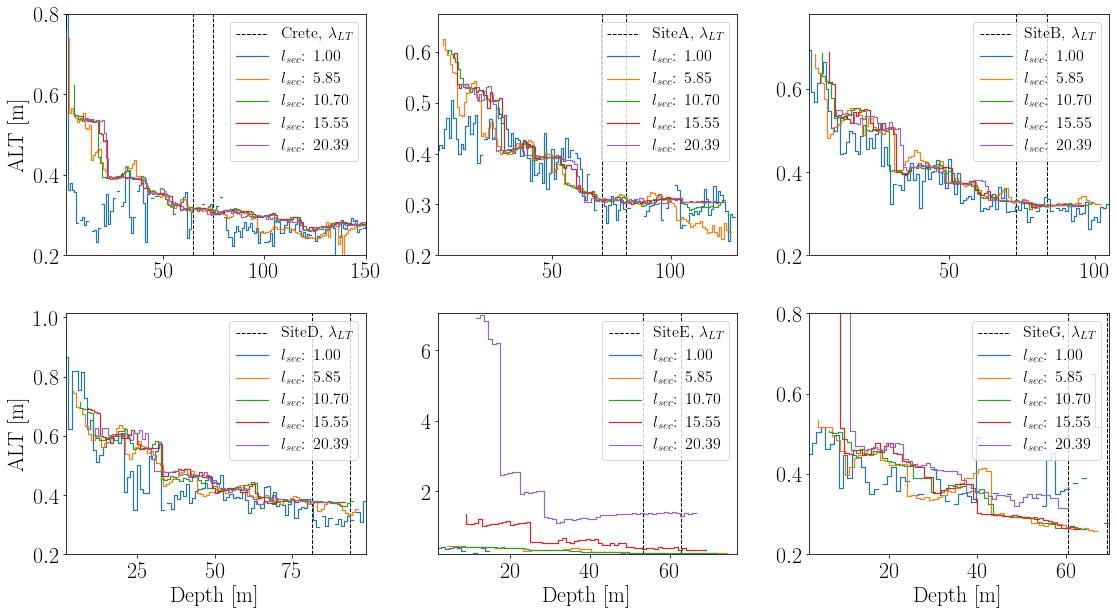

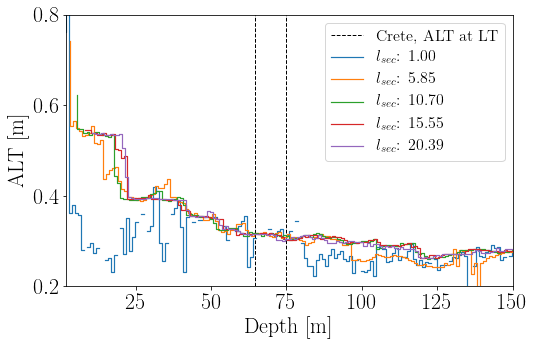

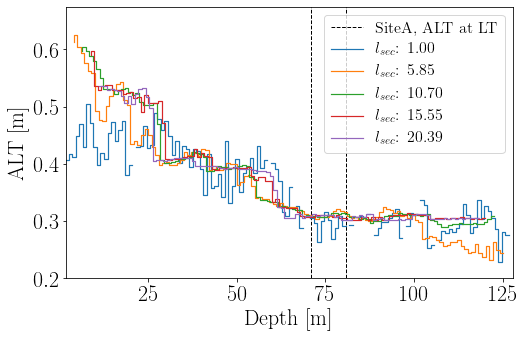

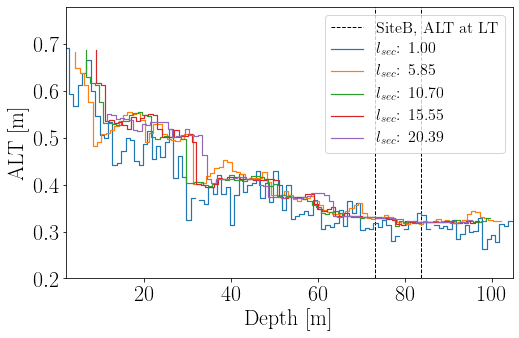

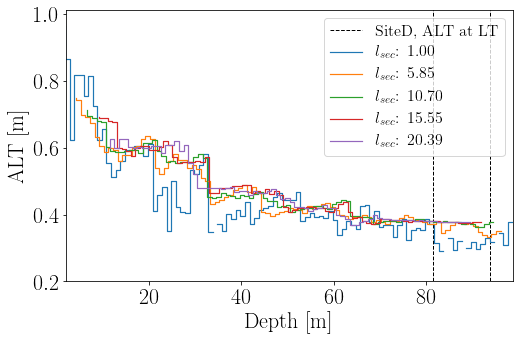

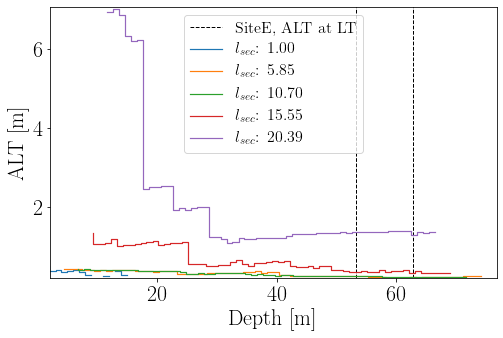

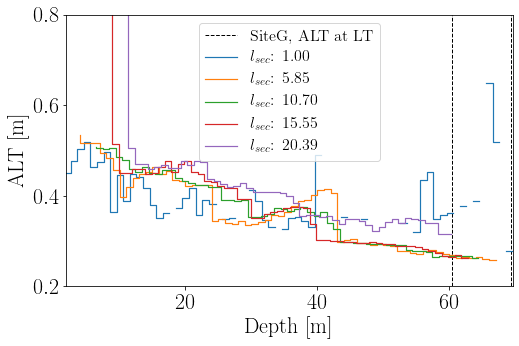

In [107]:
fig, axs = plt.subplots(2,int(np.ceil(len(sites)/2)),figsize=(16,9))
plt.close()
lens = np.linspace(1,25, 100)

for i, ax in zip(range(len(sites)),axs.flatten()):
    site = sites[i]
    dataAllLens = pd.read_csv(pathResults+site+'_ALTvDepth_AllLens.csv')
    maxsALT = []
    maxsSecs = []
    
    fig1, ax1 = plt.subplots(figsize=(8,5))
    ax1.axvline(dLakis[i], lw=1, ls='--', c='k', label=site+', ALT at LT')
    ax1.axvline(dTambs[i], lw=1, ls='--', c='k')
    
    ax.axvline(dLakis[i], lw=1, ls='--', c='k', label=site+', $\lambda_{LT}$')
    ax.axvline(dTambs[i], lw=1, ls='--', c='k')
    for j in range(len(dataALTvLens)):
        if j%20 == 0:
            secs = dataAllLens['secs'+str(j)]
            lMean = dataAllLens['lMean'+str(j)]
            lStd = dataAllLens['lStd'+str(j)]
            maxsALT.append(max(lMean))
            maxsSecs.append(max(secs))
            ax.step(secs,lMean, lw=1.2, label='$l_{sec}$: '+f'{lens[j]:.2f}')
            ax1.step(secs,lMean, lw=1.2, label='$l_{sec}$: '+f'{lens[j]:.2f}')
            
            #axs.flatten()[-1].step(secs, lMean, c=colors[i])
    #ax.set(xlim=(min(secs)-1,max(secs)+5))
    
    
    ax.legend(fontsize=16, loc='upper right')
    ax1.legend(fontsize=16)
    
    if i == 5:
        ax.set(xlim=(2,max(maxsSecs)), ylim=(0.2,0.8))
        ax1.set(xlim=(2,max(maxsSecs)), ylim=(0.2,0.8))
    elif i == 0:
        ax.set(xlim=(2,150), ylim=(0.2,0.8))
        ax1.set(xlim=(2,150), ylim=(0.2,0.8))
    else:
        ax.set(xlim=(2,max(maxsSecs)), ylim=(0.2,max(maxsALT)+0.05))
        ax1.set(xlim=(2,max(maxsSecs)), ylim=(0.2,max(maxsALT)+0.05))
    #axs.flatten()[-1].axvline(dLakis[i], lw=1, ls='--', c=colors[i], label=site+' LT')
    #axs.flatten()[-1].axvline(dTambs[i], lw=1, ls='--', c=colors[i])
    if i in [0,3]:
        ax.set(ylabel='ALT [m]')
    if i in [3,4,5]:
        ax.set(xlabel='Depth [m]')

    ax1.set_ylabel('ALT [m]')
    ax1.set_xlabel('Depth [m]')
    
    if saveFigs:
        fig1.savefig(pathFigures+site+'_ALT_at_DiffLsecs.png',bbox_inches='tight')

#axs.flatten()[-1].set(xlabel='Depth [m]', xlim=(0,130), ylim=(0.2,2))
#axs.flatten()[-1].legend(loc='upper right', fontsize=16)
fig.tight_layout()
fig

In [108]:
if saveFigs:
    fig.savefig(pathFigures+'AllCores_ALT_at_DiffLsecs_wCrete.pdf',bbox_inches='tight')


# ALT effect on sigma

### Acceptance Percentage 

In [125]:
site = 'Crete'
N_InInt = 33

CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']


core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb = CoreSpecs['dTamb']
dLaki = CoreSpecs['dLaki']
accum0 = CoreSpecs['Accum0']
accumIE = CoreSpecs['Accum1']
Temp0 = CoreSpecs['T0']

DataAll = GetCoreData(site, 'Alphabet')

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth = data_d18O['depth']
d18O = data_d18O['d18O']

depth_LT = data_d18O_LT['depth']
d18O_LT = data_d18O_LT['d18O']


No ECM file found, setting empty df instead


<ipython-input-125-d94deb82c1b0>:17: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  DataAll = GetCoreData(site, 'Alphabet')


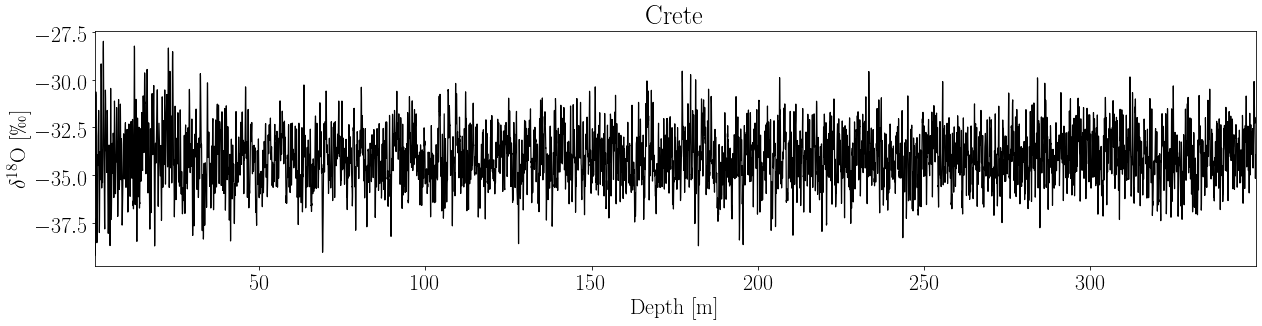

In [142]:
fig, ax = plt.subplots(figsize=(18,5))
depthLim = 350

ax.plot(depth[depth<depthLim],d18O[depth<depthLim], c='k',lw=1.2)
ax.set_xlim((min(depth[depth<depthLim]), max(depth[depth<depthLim])))
ax.set_title(site)
ax.set_xlabel('Depth [m]')
ax.set_ylabel('$\delta^{18}$O [$\permil$]')
fig.tight_layout()

#fig.savefig(pathFigures + site+'_first100m.pdf', bbox_inches='tight')   

In [3]:
acceptPct_dist_ins = np.linspace(0.2,1,2)
acceptPct_dist_ins

array([0.2, 1. ])

SyntaxError: unexpected EOF while parsing (<ipython-input-4-305a9fba17f3>, line 8)

In [5]:
dataAll = pd.DataFrame({'depth':depth,'d18O':d18O}, index=None)
Trans = ['DCT', 'NDCT', 'FFT']

instDCT = BackDiffuse(site, dataAll, CoresSpecs, dTamb, dLaki, N_InInt, diffLenData=data_diff_LT[['Depth','sigma_o18']], densData=data_dens_LT, Dist=30, transType = Trans[0])

for i in range(len(acceptPct_dist_ins)):
    print(f'{i+1}/{len(acceptPct_dist_ins)}')
    depDCT, datDCT, diffDCT, PsDCT, TsDCT, patsDCT = instDCT.BackDiffused_constraints(shift_in=2,acceptPct_dist_in=acceptPct_dist_ins[i])

1/2
ALT file does NOT exist. Computing ALT for core.
Entire core: 1.16-105.605 [m]

Sigma fit: 7.59
Min sigma analyt: 7.58
Starting sigma: 5.58 [cm]
Final sigma: 7.42 [cm]
Final # of peaks: 33
Delta: 0.038
Delta new: 0.019
2/2
ALT file does NOT exist. Computing ALT for core.
Entire core: 1.16-105.605 [m]

Sigma fit: 7.59
Min sigma analyt: 7.58
Starting sigma: 5.58 [cm]
Final sigma: 7.42 [cm]
Final # of peaks: 33
Delta: 0.038
Delta new: 0.019


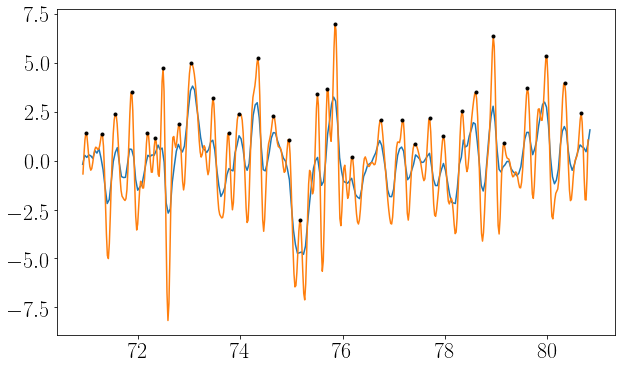

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
plt.plot(depth_LT, d18O_LT-np.mean(d18O_LT))
plt.plot(depDCT, datDCT)
plt.plot(depDCT[PsDCT], datDCT[PsDCT],'.', c='k')

###  Variation of mean (mean +/- std)

In [6]:
sites = ['SiteA', 'SiteB', 'SiteD', 'SiteE', 'SiteG']

CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

dTambs = np.zeros(len(sites))
dLakis = np.zeros(len(sites))

for i in range(len(sites)):
    coreNames = CoresSpecs['CoreName']

    core_idx = coreNames[CoresSpecs['CoreName'] == sites[i]].index[0]
    CoreSpecs = CoresSpecs.iloc[core_idx]
    dTambs[i] = CoreSpecs['dTamb']
    dLakis[i] = CoreSpecs['dLaki']

In [7]:
i = 0

site = sites[i]
dLaki = dLakis[i]
dTamb = dTambs[i]
shift_in=1
lSecs_in=7
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'

In [9]:

data = pd.read_csv(pathResults + site + '_ALT_FullCore_Pshift_'+str(int(shift_in))+'_lSecs_'+str(lSecs_in)+'.csv')

lDCT = np.asarray(data['lDCT']);lNDCT = np.asarray(data['lNDCT']);lFFT = np.asarray(data['lFFT']);
vals_use = data['depth']

lks = np.c_[lDCT,lNDCT,lFFT]
lks_LT = lks[(vals_use>dTamb)&(vals_use<dLaki)]
l_LT = np.mean(lks_LT)
lStd_LT = np.std(lks_LT)
print(f'ALT at LT estimate:{l_LT:.3f} +/- {lStd_LT:.3f}')

ALT at LT estimate:0.311 +/- 0.004


# No Constraints vs. Constraints

### First, a qualitative visual analysis of all cores, constrained and unconstrained

In [13]:
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'

sites = ['SiteA', 'Crete']#['SiteA', 'SiteB', 'SiteD', 'SiteE', 'SiteG']

<ipython-input-14-fca256a6faa8>:12: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  DataAll = GetCoreData(site, 'Alphabet')


No ECM file found, setting empty df instead


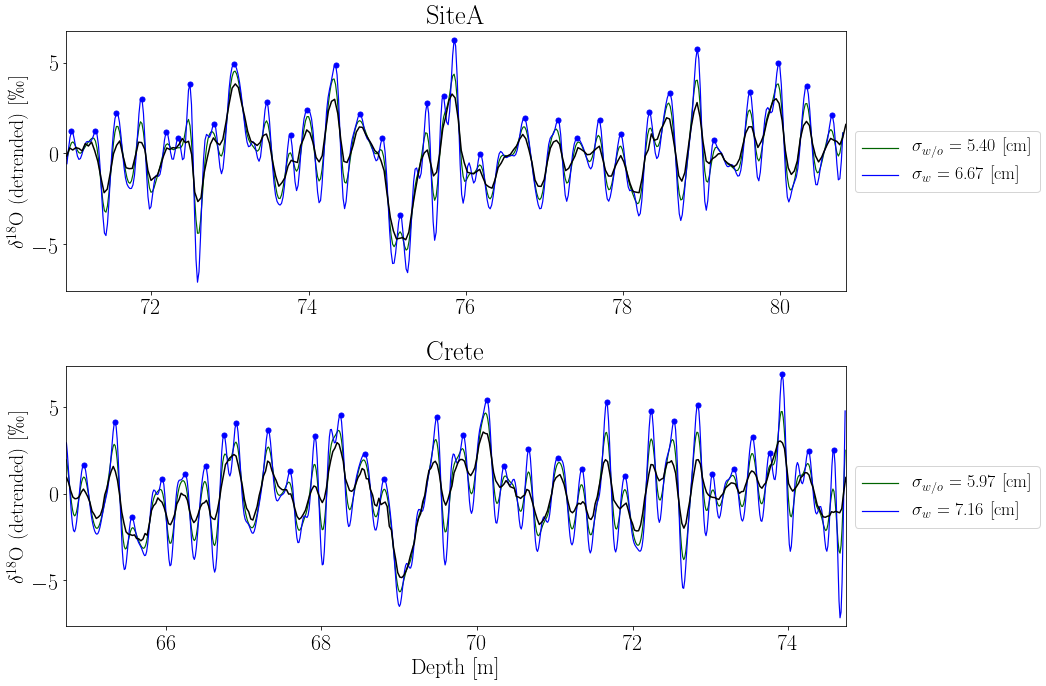

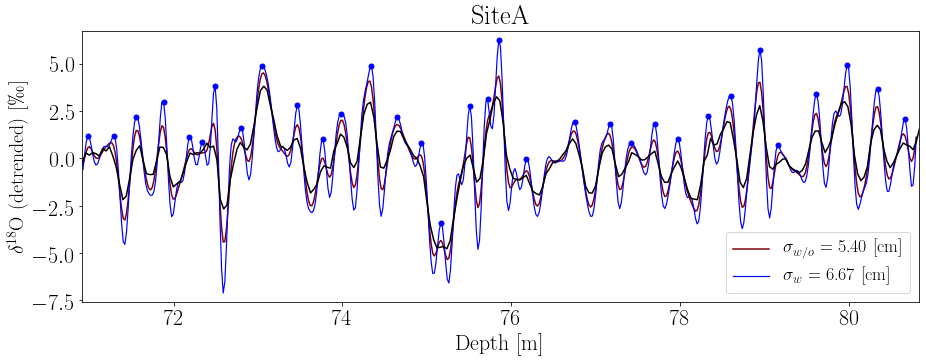

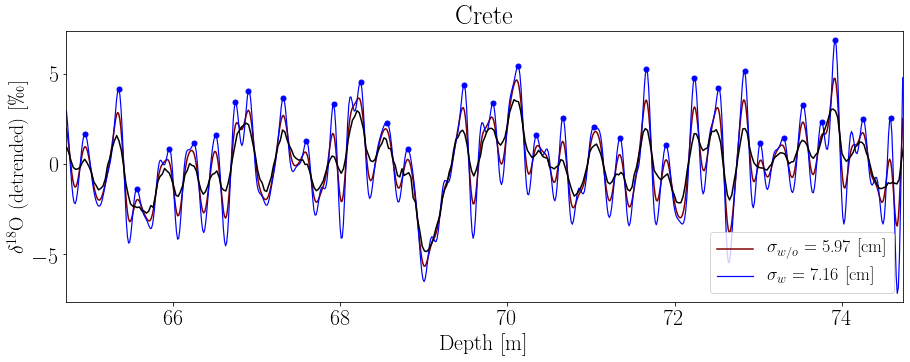

In [14]:
fig, axs = plt.subplots(len(sites),1,figsize = (15,10))

for site, i in zip(sites,range(len(sites))):

    CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')
    coreNames = CoresSpecs['CoreName']


    core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
    CoreSpecs = CoresSpecs.iloc[core_idx]

    DataAll = GetCoreData(site, 'Alphabet')

    data_d18O_LT = DataAll[1]

    depth_LT = data_d18O_LT['depth']
    d18O_LT = data_d18O_LT['d18O']
    
    
    dataBD_NoConst = pd.read_csv(pathResults+site+'_EffectsSigma_NoConstraints.csv')
    depth_NoC = dataBD_NoConst['depth']; data_NoC = dataBD_NoConst['data']
    idxPeaks_NoC = dataBD_NoConst['idxPeaks'][dataBD_NoConst['idxPeaks'].notna()]
    diffLen_NoC = float(dataBD_NoConst['sigma'][dataBD_NoConst['sigma'].notna()])
    
    dataBD_Const = pd.read_csv(pathResults+site+'_EffectsSigma_Constraints.csv')    
    depth_C = dataBD_Const['depth']; data_C = dataBD_Const['data']
    idxPeaks_C = dataBD_Const['idxPeaks'][dataBD_Const['idxPeaks'].notna()]
    diffLen_C = float(dataBD_Const['sigma'][dataBD_Const['sigma'].notna()])

    axs[i].plot(depth_NoC, data_NoC, c='darkgreen', lw=1.2, label='$\sigma_{w/o}$ = '+f'{diffLen_NoC*100:.2f} [cm]')
    #axs[1].plot(depthEst[idxPeak], dataEst[idxPeak], '.', c='darkgreen', ms=10)
    axs[i].plot(depth_C, data_C, c='b', lw=1.2, label='$\sigma_w$ = '+f'{diffLen_C*100:.2f} [cm]')
    axs[i].plot(depth_C[idxPeaks_C],data_C[idxPeaks_C], '.', c='b', ms=10)
    axs[i].plot(depth_LT, d18O_LT-np.mean(d18O_LT), c='k', lw=1.5)

    axs[i].set(xlim=(min(depth_LT), max(depth_LT)), ylim=(min(data_C)-0.5, max(data_C)+0.5), title=site)
    axs[i].legend(fontsize=18,bbox_to_anchor=(1, 0.65));
    axs[i].set_ylabel('$\delta^{18}$O (detrended) [$\permil$]', fontsize=20)
    
    fig1, ax1 = plt.subplots(figsize=(15,5))
    ax1.plot(depth_NoC, data_NoC, c='maroon', lw=1.5, label='$\sigma_{w/o}$ = '+f'{diffLen_NoC*100:.2f} [cm]')
    #axs[1].plot(depthEst[idxPeak], dataEst[idxPeak], '.', c='darkgreen', ms=10)
    ax1.plot(depth_C, data_C, c='b', lw=1.2, label='$\sigma_w$ = '+f'{diffLen_C*100:.2f} [cm]')
    ax1.plot(depth_C[idxPeaks_C],data_C[idxPeaks_C], '.', c='b', ms=10)
    ax1.plot(depth_LT, d18O_LT-np.mean(d18O_LT), c='k', lw=1.5)

    ax1.set(xlim=(min(depth_LT), max(depth_LT)), ylim=(min(data_C)-0.5, max(data_C)+0.5), title=site)
    ax1.set_xlabel('Depth [m]')
    ax1.set_ylabel('$\delta^{18}$O (detrended) [$\permil$]', fontsize=20)
    ax1.legend(fontsize=18)#,bbox_to_anchor=(1, 0.65));
    
    if saveFigs:
        fig1.savefig(pathFigures + site+'_ConstVNoConst.pdf', bbox_inches='tight')    
axs[-1].set(xlabel='Depth [m]')    
fig.tight_layout()


No handles with labels found to put in legend.


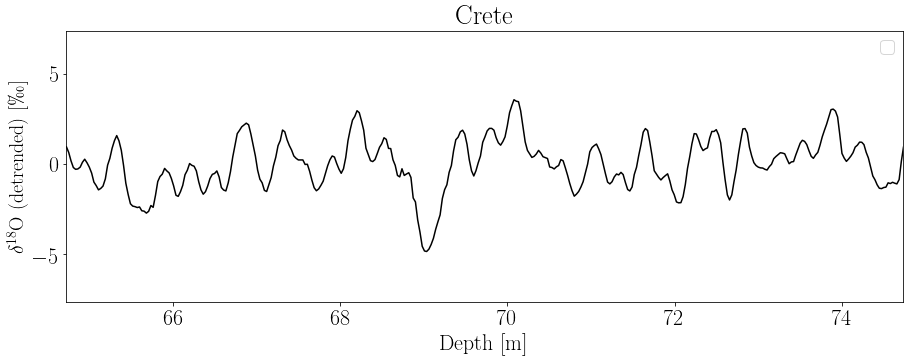

In [18]:
fig1, ax1 = plt.subplots(figsize=(15,5))
#ax1.plot(depth_NoC, data_NoC, c='maroon', lw=1.5, label='$\sigma_{w/o}$ = '+f'{diffLen_NoC*100:.2f} [cm]')
#axs[1].plot(depthEst[idxPeak], dataEst[idxPeak], '.', c='darkgreen', ms=10)
#ax1.plot(depth_C, data_C, c='b', lw=1.2, label='$\sigma_w$ = '+f'{diffLen_C*100:.2f} [cm]')
#ax1.plot(depth_C[idxPeaks_C],data_C[idxPeaks_C], '.', c='b', ms=10)
ax1.plot(depth_LT, d18O_LT-np.mean(d18O_LT), c='k', lw=1.5)

ax1.set(xlim=(min(depth_LT), max(depth_LT)), ylim=(min(data_C)-0.5, max(data_C)+0.5), title=site)
ax1.set_xlabel('Depth [m]')
ax1.set_ylabel('$\delta^{18}$O (detrended) [$\permil$]', fontsize=20)
ax1.legend(fontsize=18)#,bbox_to_anchor=(1, 0.65));

if saveFigs:
    fig1.savefig(pathFigures + site+'_RawData.pdf', bbox_inches='tight')    

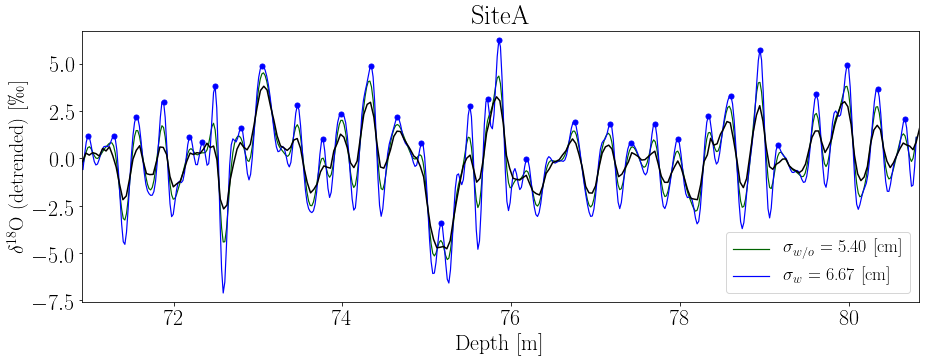

In [8]:
fig1

In [117]:
if saveFigs:
    fig.savefig(pathFigures + 'AllCores_ConstVNoConst.png', bbox_inches='tight')    

### Quantitative examination of diff Lens based on ALT

In [19]:
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'
site = 'Crete'
dataConst = pd.read_csv(pathResults+site+'_diffLens_ConstraintsGauss.csv', ' ', header=None)
dataNoConst = pd.read_csv(pathResults+site+'_diffLens_NoConstraintsGauss.csv', ' ', header=None)

t_w = dataConst.loc[0]
diffLens_wIn = dataConst.loc[1]
dTambs_w = dataConst.loc[2]
dLakis_w = dataConst.loc[3]

t_wo = dataNoConst.loc[0]
diffLens_woIn = dataNoConst.loc[1]
dTambs_wo = dataNoConst.loc[2]
dLakis_wo = dataNoConst.loc[3]


diffLens_wo = diffLens_woIn * 100
diffLens_w = diffLens_wIn * 100


In [20]:
dataConst

0          1          2          3          4          5    \
0   8.054043   7.517952   7.300868   7.355574   8.040980  12.403314   
1   0.069796   0.072863   0.070129   0.072711   0.069573   0.071343   
2  64.728839  64.705973  64.725356  64.689340  64.660152  64.729219   
3  74.744000  74.740053  74.718825  74.742092  74.738212  74.776196   

         6          7          8          9    ...        490        491  \
0   8.547382   9.533163  10.266203  11.530529  ...   8.939381   7.488002   
1   0.067816   0.072794   0.067675   0.071343  ...   0.067962   0.067816   
2  64.736703  64.715865  64.659782  64.729183  ...  64.677855  64.718231   
3  74.767463  74.714121  74.757473  74.783147  ...  74.785396  74.763737   

         492        493        494        495        496        497  \
0   7.164534   7.924687   7.356524   8.078495   6.403257   8.906880   
1   0.072833   0.070905   0.069573   0.071104   0.069916   0.067962   
2  64.701768  64.674785  64.658683  64.677310  64.727889  64.681738   
3  74.725337  74.749701  74.742901  74.765048  74.731265  74.779481   

         498        499  
0   6.926403   7.334136  
1   0.071445   0.071621  
2  64.692113  64.712929  
3  74.770176  74.757389  

[4 rows x 500 columns]

In [28]:
t_wo[t_wo>100] = 0
max(t_wo)

32.20620656013489

Text(0.5, 0.98, 'Crete')

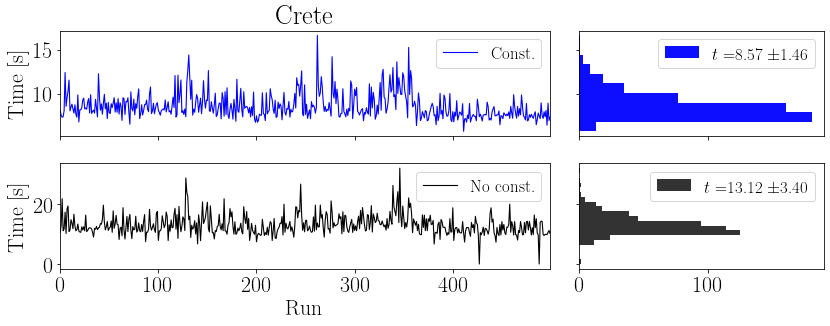

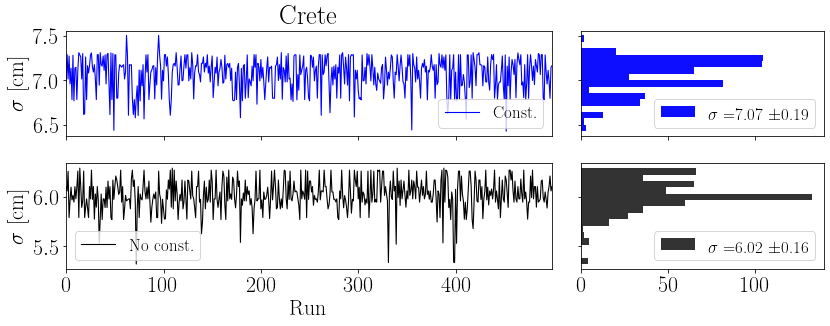

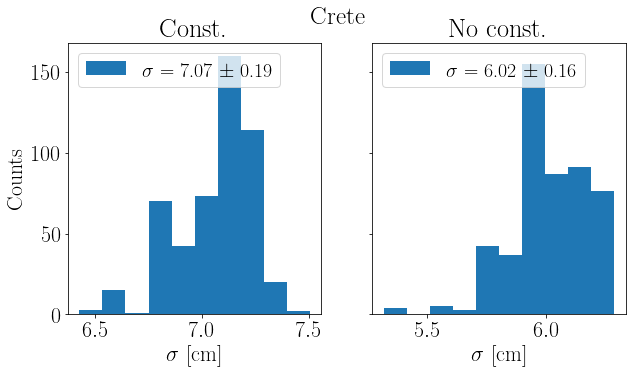

In [32]:
fig, ax = plt.subplots(2,2,gridspec_kw={'width_ratios':[2,1]},figsize=(12,5), sharex='col', sharey='row')


ax[0,0].plot(np.arange(len(t_w)), t_w, lw=1.1, c='b', label='Const.')
ax[0,0].set(xlim=(0,len(t_w)-1), ylabel='Time [s]', title=site)


ax[1,0].plot(np.arange(len(t_wo)), t_wo, lw=1.1, c='k', label='No const.')
ax[1,0].set(xlim=(0,len(t_wo)-1), xlabel='Run', ylabel='Time [s]')

ax[0,1].hist(t_w, orientation='horizontal', color='b', alpha=0.95, label=f'$t=${np.mean(t_w):.2f} $\pm${np.std(t_w):.2f}')
ax[1,1].hist(t_wo, orientation='horizontal', color='k', alpha=0.8, bins=20, label=f'$t=${np.mean(t_wo):.2f} $\pm${np.std(t_wo):.2f}')
ax[0,0].legend(fontsize=17); ax[0,1].legend(fontsize=17); ax[1,0].legend(fontsize=17); ax[1,1].legend(fontsize=17)
fig.tight_layout()




if saveFigs:
    fig.savefig(pathFigures + site + '_ConstVNoConst_time.pdf', bbox_inches='tight')





fig, ax = plt.subplots(2,2,gridspec_kw={'width_ratios':[2,1]},figsize=(12,5), sharex='col', sharey='row')


ax[0,0].plot(np.arange(len(diffLens_w)), diffLens_w, lw=1.1, c='b', label='Const.')
ax[0,0].set(xlim=(0,len(diffLens_w)-1), ylabel='$\sigma$ [cm]', title=site)


ax[1,0].plot(np.arange(len(diffLens_wo)), diffLens_wo, lw=1.1, c='k', label='No const.')
ax[1,0].set(xlim=(0,len(diffLens_wo)-1), xlabel='Run', ylabel='$\sigma$ [cm]')


ax[0,1].hist(diffLens_w, orientation='horizontal', color='b', alpha=0.95, bins=15, label=f'$\sigma=${np.mean(diffLens_w):.2f} $\pm${np.std(diffLens_w):.2f}')
ax[1,1].hist(diffLens_wo, orientation='horizontal', color='k', alpha=0.8, bins=15, label=f'$\sigma=${np.mean(diffLens_wo):.2f} $\pm${np.std(diffLens_wo):.2f}')
ax[0,0].legend(fontsize=17); ax[0,1].legend(fontsize=17); ax[1,0].legend(fontsize=17); ax[1,1].legend(fontsize=17)
fig.tight_layout()

if saveFigs:
    fig.savefig(pathFigures + site + '_ConstVNoConst_sigma.pdf', bbox_inches='tight')





fig, ax = plt.subplots(1,2,figsize=(10,5), sharey=True)

ax[0].hist(diffLens_w, bins=10, label=f'$\sigma$ = {np.mean(diffLens_w):.2f} $\pm$ {np.std(diffLens_w):.2f}')
ax[1].hist(diffLens_wo, bins=10, label=f'$\sigma$ = {np.mean(diffLens_wo):.2f} $\pm$ {np.std(diffLens_wo):.2f}')
ax[0].legend(fontsize=20, loc='upper left')
ax[1].legend(fontsize=20, loc='upper left')

ax[0].set(xlabel='$\sigma$ [cm]', ylabel='Counts', title='Const.')
ax[1].set(xlabel='$\sigma$ [cm]', title='No const.')

#fig.tight_layout()
fig.suptitle(site, fontsize=25)



In [82]:
sites = ['SiteA', 'SiteB', 'SiteD', 'SiteE', 'SiteG']

CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

dTambs = np.zeros(len(sites))
dLakis = np.zeros(len(sites))

for i in range(len(sites)):
    coreNames = CoresSpecs['CoreName']

    core_idx = coreNames[CoresSpecs['CoreName'] == sites[i]].index[0]
    CoreSpecs = CoresSpecs.iloc[core_idx]
    dTambs[i] = CoreSpecs['dTamb']
    dLakis[i] = CoreSpecs['dLaki']

In [210]:
for i in range(len(sites)):
    site = sites[i]

    data = pd.read_csv(pathResults + site + '_ALT_FullCore_Pshift_50.csv')
    lDCT = data['lDCT']
    lNDCT = data['lNDCT']
    lFFT = data['lFFT']
    secs = data['depth']
    
    lDCT_LT = lDCT[(secs >= dTambs[i]) & (secs <= dLakis[i])]
    lNDCT_LT = lNDCT[(secs >= dTambs[i]) & (secs <= dLakis[i])]
    lFFT_LT = lFFT[(secs >= dTambs[i]) & (secs <= dLakis[i])]
    lsToMean = np.asarray(pd.concat([lDCT_LT,lNDCT_LT,lFFT_LT]))[np.where(pd.concat([lDCT_LT,lNDCT_LT,lFFT_LT])>0)[0]]
    lMean = np.mean(lsToMean)
    lStd = np.std(lsToMean)
    print('\t####'+site+'####')
    print(f'ALT estimate: {lMean:.3f} +/- {lStd:.3f}\n')

	####SiteA####
ALT estimate: 0.311 +/- 0.006

	####SiteB####
ALT estimate: 0.326 +/- 0.008

	####SiteD####
ALT estimate: 0.354 +/- 0.012

	####SiteE####
ALT estimate: 0.246 +/- 0.005

	####SiteG####
ALT estimate: 0.264 +/- 0.006



# LT location distributions

### Variation over entire deposition sections (gauss distribution)

In [33]:
site = 'Crete'
N_InInt = 33

CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']


core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb_in = CoreSpecs['dTambCor']
dLaki_in = CoreSpecs['dLakiCor']
accum0 = CoreSpecs['Accum0']
accumIE = CoreSpecs['Accum1']
Temp0 = CoreSpecs['T0']

DataAll = GetCoreData(site, 'Alphabet')

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth = data_d18O['depth']
d18O = data_d18O['d18O']

depth_LT = data_d18O_LT['depth']
d18O_LT = data_d18O_LT['d18O']


No ECM file found, setting empty df instead


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-33-43514328a6ec>:17: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  DataAll = GetCoreData(site, 'Alphabet')


#### Vary both L and T

In [34]:
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'
site='Crete'
diffLens, dTambs, dLakis = np.array(pd.read_csv(pathResults + site+'diffLens_GaussDistwDepths.csv', ' ', header=None))


FileNotFoundError: [Errno 2] No such file or directory: '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/CretediffLens_GaussDistwDepths.csv'

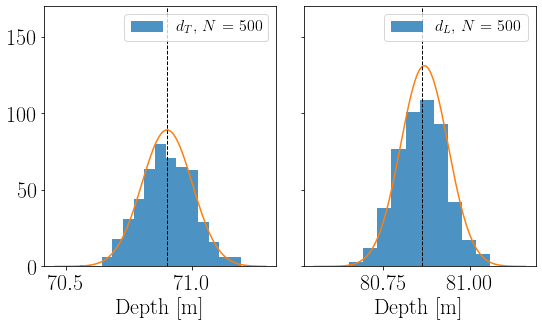

In [112]:

mu1 = dTamb_in
mu2 = dLaki_in

sig1 = CoreSpecs['lenTambCor']/400
sig2 = CoreSpecs['lenLakiCor']/500

xs1 = np.linspace(min(dTambs)-0.1, max(dTambs)+0.1, 1000)
xs2 = np.linspace(min(dLakis)-0.1, max(dLakis)+0.1, 1000)
gauss1 = func_gaussian(xs1, np.sqrt(500), mu1, sig1, 0)
gauss2 = func_gaussian(xs2, np.sqrt(500), mu2, sig2, 0)



fig, ax = plt.subplots(1,2,figsize=(8,5), sharey=True)

ax[0].hist(dTambs, alpha=0.8, bins=15, label='$d_{T}$, $N$ = '+f'{len(dTambs)}')
ax[0].plot(xs1, gauss1)
ax[0].axvline(np.mean(dTambs), c='k', lw=1,ls='--')
ax[0].legend(fontsize=16)
ax[0].set(xlabel = 'Depth [m]', ylim=(0,170))

ax[1].hist(dLakis, alpha=0.8, bins=10, label='$d_{L}$, $N$ = '+f'{len(dTambs)}')
ax[1].plot(xs2, gauss2)
ax[1].axvline(np.mean(dLakis), c='k', lw=1,ls='--')
ax[1].legend(fontsize=16)
ax[1].set(xlabel = 'Depth [m]')
fig.tight_layout()

In [113]:
sigMin = 0.0
sigMax = 0.15

diffLensUse = diffLens[(diffLens>sigMin) & (diffLens < sigMax)]
dTambsUse = dTambs[(diffLens>sigMin) & (diffLens < sigMax)]
dLakisUse = dLakis[(diffLens>sigMin) & (diffLens < sigMax)]
#diffLensUse[diffLensUse<0.04] = 0.047


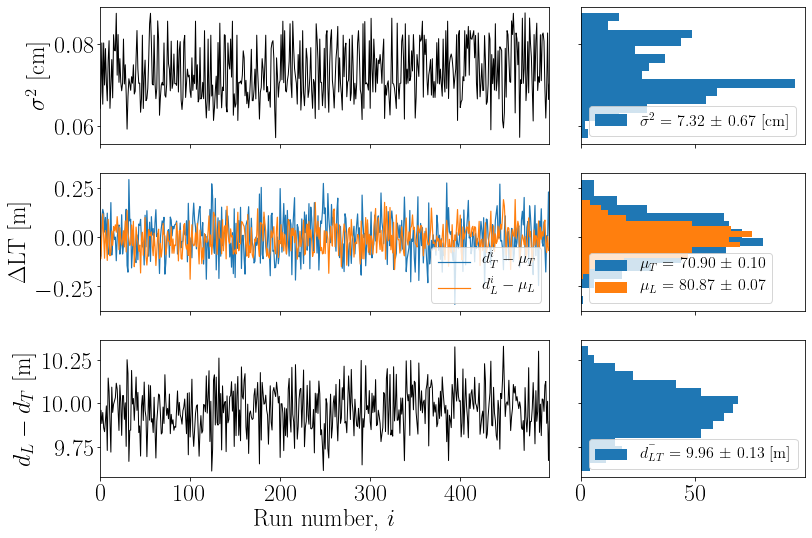

In [117]:
x = np.arange(0,len(diffLensUse))

sigmaMean = np.mean(diffLensUse)*100
sigmaSTD = np.std(diffLensUse)*100
sigmaMean_LT = np.mean(dLakis-dTambs)
sigmaSTD_LT = np.std(dLakis-dTambs)

fig, ax = plt.subplots(3,2,gridspec_kw={'width_ratios':[2,1]},figsize=(12,8), sharex='col', sharey='row')

mpl.rcParams['font.size'] = 24

ax[0,0].plot(x,diffLensUse,c='k',lw=1)
ax[0,0].set(xlim=(min(x),max(x)), ylabel='$\sigma$ [cm]')
ax[0,1].hist(diffLensUse, bins=15, orientation="horizontal", label=r'$\bar\sigma =$ ' + f'{sigmaMean:.2f} $\pm$ {sigmaSTD:.2f} [cm]');
#ax[0,1].set(xlabel='Counts')
ax[0,1].legend(fontsize=16, loc='lower left')

ax[1,0].plot(x,dTambsUse-mu1,lw=1.2, label='$d_{T}^i-\mu_{T}$')
ax[1,0].plot(x,dLakisUse-mu2,lw=1.2,  label='$d_{L}^i-\mu_{L}$')
ax[1,0].set(xlim=(min(x),max(x)), ylabel='$\Delta$LT [m]')
ax[1,0].legend(fontsize=16)
ax[1,1].hist(dTambsUse-mu1, bins=15, orientation="horizontal", label=f'$\mu_T = $ {mu1:.2f} $\pm$ {sig1:.2f}');
ax[1,1].hist(dLakisUse-mu2, bins=15, orientation="horizontal", label=f'$\mu_L = $ {mu2:.2f} $\pm$ {sig2:.2f}');
ax[1,1].legend(fontsize=16, loc='lower left')

ax[2,0].plot(x,dLakisUse-dTambsUse,c='k',lw=1)
ax[2,0].set(xlim=(min(x),max(x)), xlabel='Run number, $i$', ylabel='$d_{L}-d_{T}$ [m]')
ax[2,1].hist(dLakisUse-dTambsUse, bins=15, orientation="horizontal", label=r'$\bar{d_{LT}} =$ ' + f'{sigmaMean_LT:.2f} $\pm$ {sigmaSTD_LT:.2f} [m]')
ax[2,1].legend(fontsize=16, loc='lower left')

fig.tight_layout()

In [118]:
if saveFigs:
    fig.savefig(pathFigures + site + '_Vary_LandT.pdf', bbox_inches='tight')

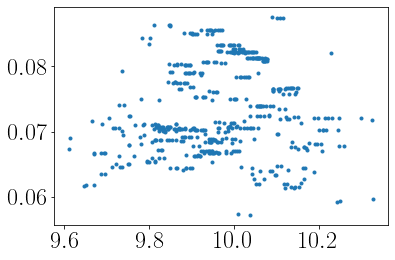

In [9]:
plt.plot(dLakisUse-dTambsUse, diffLensUse,'.')

#### Vary only L

In [142]:
site = 'SiteA'

In [143]:
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'

diffLens, dTambs, dLakis = np.array(pd.read_csv(pathResults + site+'_diffLens_GaussDistwDepths_Laki.csv', ' ', header=None))

from scipy import stats
from scipy.stats import binom, poisson, norm

In [144]:
sigMin = 0.0
sigMax = 0.15

diffLensUse = diffLens[(diffLens>sigMin) & (diffLens < sigMax)]
dTambsUse = dTambs[(diffLens>sigMin) & (diffLens < sigMax)]
dLakisUse = dLakis[(diffLens>sigMin) & (diffLens < sigMax)]
#diffLensUse[diffLensUse<0.04] = 0.047


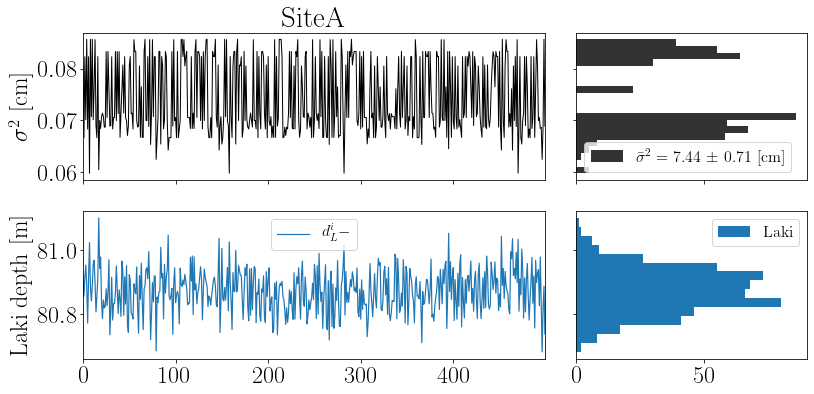

In [145]:
x = np.arange(0,len(diffLensUse))

sigmaMean = np.mean(diffLensUse)*100
sigmaSTD = np.std(diffLensUse)*100
sigmaMean_LT = np.mean(dLakis-dTambs)
sigmaSTD_LT = np.std(dLakis-dTambs)

fig, ax = plt.subplots(2,2,gridspec_kw={'width_ratios':[2,1]},figsize=(12,6), sharex='col', sharey='row')

mpl.rcParams['font.size'] = 24

ax[0,0].plot(x,diffLensUse,c='k',lw=1)
ax[0,0].set(xlim=(min(x),max(x)), ylabel='$\sigma^2$ [cm]', title=site)
ax[0,1].hist(diffLensUse, bins=20, orientation="horizontal", color='k',alpha=0.8,label=r'$\bar\sigma^2 =$ ' + f'{sigmaMean:.2f} $\pm$ {sigmaSTD:.2f} [cm]');
#ax[0,1].set(xlabel='Counts')
ax[0,1].legend(fontsize=16, loc='lower left')

#ax[1,0].plot(x,dTambsUse,lw=1.2, label='$d_{T}^i$')
ax[1,0].plot(x,dLakisUse,lw=1.2,  label='$d_{L}^i-$')
ax[1,0].set(xlim=(min(x),max(x)), ylabel='Laki depth [m]')
ax[1,0].legend(fontsize=16)
#ax[1,1].hist(dTambsUse, bins=15, orientation="horizontal");
ax[1,1].hist(dLakisUse, bins=15, orientation="horizontal", label='Laki');
ax[1,1].legend(fontsize=16)

fig.tight_layout()

In [146]:
saveFigs

True

In [147]:
if saveFigs:
    fig.savefig(pathFigures + site + '_Vary_Lonly.pdf', bbox_inches='tight')

#### Vary only T

In [148]:
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'

diffLens, dTambs, dLakis = np.array(pd.read_csv(pathResults + site+'_diffLens_GaussDistwDepths_Tamb.csv', ' ', header=None))


In [149]:
sigMin = 0.0
sigMax = 0.15

diffLensUse = diffLens[(diffLens>sigMin) & (diffLens < sigMax)]
dTambsUse = dTambs[(diffLens>sigMin) & (diffLens < sigMax)]
dLakisUse = dLakis[(diffLens>sigMin) & (diffLens < sigMax)]
#diffLensUse[diffLensUse<0.04] = 0.047


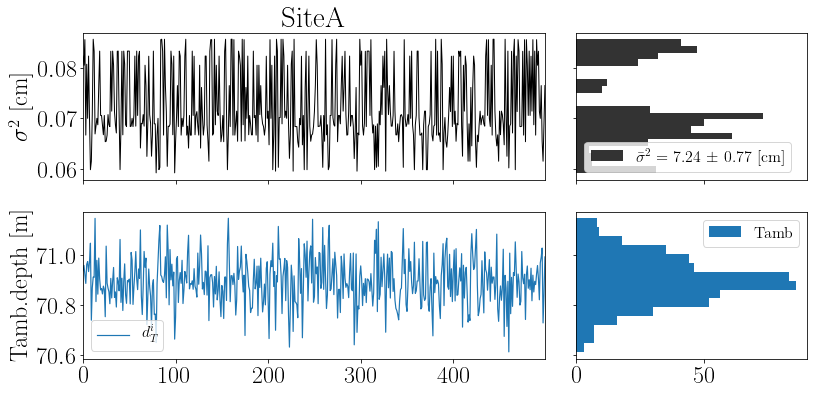

In [150]:
x = np.arange(0,len(diffLensUse))

sigmaMean = np.mean(diffLensUse)*100
sigmaSTD = np.std(diffLensUse)*100
sigmaMean_LT = np.mean(dLakis-dTambs)
sigmaSTD_LT = np.std(dLakis-dTambs)

fig, ax = plt.subplots(2,2,gridspec_kw={'width_ratios':[2,1]},figsize=(12,6), sharex='col', sharey='row')

mpl.rcParams['font.size'] = 24

ax[0,0].plot(x,diffLensUse,c='k',lw=1)
ax[0,0].set(xlim=(min(x),max(x)), ylabel='$\sigma^2$ [cm]', title=site)
ax[0,1].hist(diffLensUse, bins=20, orientation="horizontal", color='k',alpha=0.8, label=r'$\bar\sigma^2 =$ ' + f'{sigmaMean:.2f} $\pm$ {sigmaSTD:.2f} [cm]');
#ax[0,1].set(xlabel='Counts')
ax[0,1].legend(fontsize=16, loc='lower left')

ax[1,0].plot(x,dTambsUse,lw=1.2, label='$d_{T}^i$')
#ax[1,0].plot(x,dLakisUse,lw=1.2,  label='$d_{L}^i-$')
ax[1,0].set(xlim=(min(x),max(x)), ylabel='Tamb.depth [m]')
ax[1,0].legend(fontsize=16)
ax[1,1].hist(dTambsUse, bins=15, orientation="horizontal", label='Tamb');
#ax[1,1].hist(dLakisUse, bins=15, orientation="horizontal", label='Laki');
ax[1,1].legend(fontsize=16)

fig.tight_layout()

In [151]:
if saveFigs:
    fig.savefig(pathFigures + site + '_Vary_Tonly.pdf', bbox_inches='tight')

### Variation corresponding to ~2 months

In [35]:
#site = 'SiteG'
site='Crete'
N_InInt = 33

CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']


core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb_in = CoreSpecs['dTambCor']
dLaki_in = CoreSpecs['dLakiCor']

DataAll = GetCoreData(site, 'Alphabet')

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth = data_d18O['depth']
d18O = data_d18O['d18O']

depth_LT = data_d18O_LT['depth']
d18O_LT = data_d18O_LT['d18O']


No ECM file found, setting empty df instead


<ipython-input-35-833e182384ed>:15: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  DataAll = GetCoreData(site, 'Alphabet')


In [36]:
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'

data = pd.read_csv(pathResults + site + '_ALT_FullCore_Pshift_'+str(int(1.5))+'_lSecs_'+str(7)+'.csv')

lDCT = np.asarray(data['lDCT']);lNDCT = np.asarray(data['lNDCT']);lFFT = np.asarray(data['lFFT']);
vals_use = data['depth']

lks = np.c_[lDCT,lNDCT,lFFT]
lks_LT = lks[(vals_use>=dTamb_in)&(vals_use<=dLaki_in)]


def avg(a):
    return a[a > 0].mean()
def std(a):
    return a[a>0].std()

l_LT = avg(lks_LT)
lStd_LT = std(lks_LT)

In [37]:
MLT = l_LT/6

mu = dTamb_in
mu2 = dLaki_in
sig = MLT

ds = np.linspace(dTamb_in-2,dLaki_in+2, 1000)
fs = func_gaussian(ds, 1, mu, sig, 0)
fs2 = func_gaussian(ds, 1, mu2, sig, 0)


/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


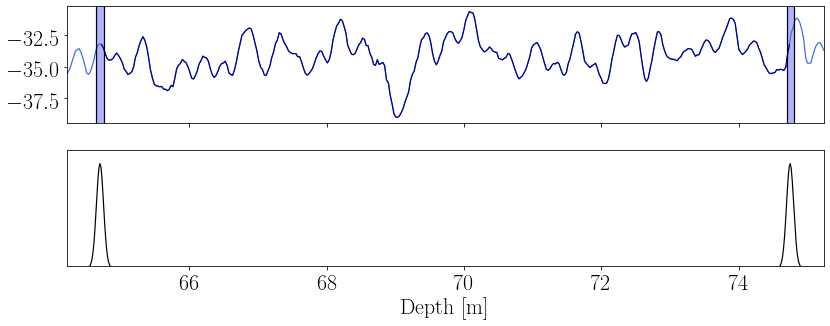

In [38]:
fig, ax = plt.subplots(2,1,figsize=(12,5), sharex=True)
delt = .5
ax[0].plot(depth[(depth > dTamb_in - delt) & (depth < dLaki_in + delt)],d18O[(depth > dTamb_in - delt) & (depth < dLaki_in + delt)], c='royalblue', lw=1.2)
ax[0].plot(depth_LT, d18O_LT, c='darkblue', lw=1.2)
ax[0].set(xlim=(min(depth_LT)-delt,max(depth_LT)+delt))
ax[0].axvline(mu-sig, lw=1.2, c='k')
ax[0].axvline(mu+sig,lw=1.2, c='k')

ax[0].axvline(dLaki_in-sig, lw=1.2, c='k')
ax[0].axvline(dLaki_in+sig,lw=1.2, c='k')
ax[0].axvspan(dLaki_in-sig, dLaki_in+sig, alpha=0.3, color='b')
ax[0].axvspan(dTamb_in-sig, dTamb_in+sig, alpha=0.3, color='b')

ax[1].plot(ds,fs, c='k', lw=1.2)
ax[1].plot(ds,fs2, c='k', lw=1.2)
ax[1].set(ylim=(0.1,max(fs)+1), xlabel='Depth [m]')
ax[1].axes.yaxis.set_visible(False)

fig.tight_layout()

In [39]:
if saveFigs:
        fig.savefig(pathFigures + site + '_LandT_Gauss_2Mnth.pdf', bbox_inches='tight')

#### Spectral transform: DCT

In [41]:
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'

diffLens, dTambs, dLakis = np.array(pd.read_csv(pathResults + site+'_diffLens_GaussDistwDepths_sigNmonths.csv', ' ', header=None))

from scipy import stats
from scipy.stats import binom, poisson, norm

FileNotFoundError: [Errno 2] No such file or directory: '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/Crete_diffLens_GaussDistwDepths_sigNmonths.csv'

In [151]:
sigMin = 0.0
sigMax = 0.15

diffLensUse = diffLens[(diffLens>sigMin) & (diffLens < sigMax)]
dTambsUse = dTambs[(diffLens>sigMin) & (diffLens < sigMax)]
dLakisUse = dLakis[(diffLens>sigMin) & (diffLens < sigMax)]
#diffLensUse[diffLensUse<0.04] = 0.047


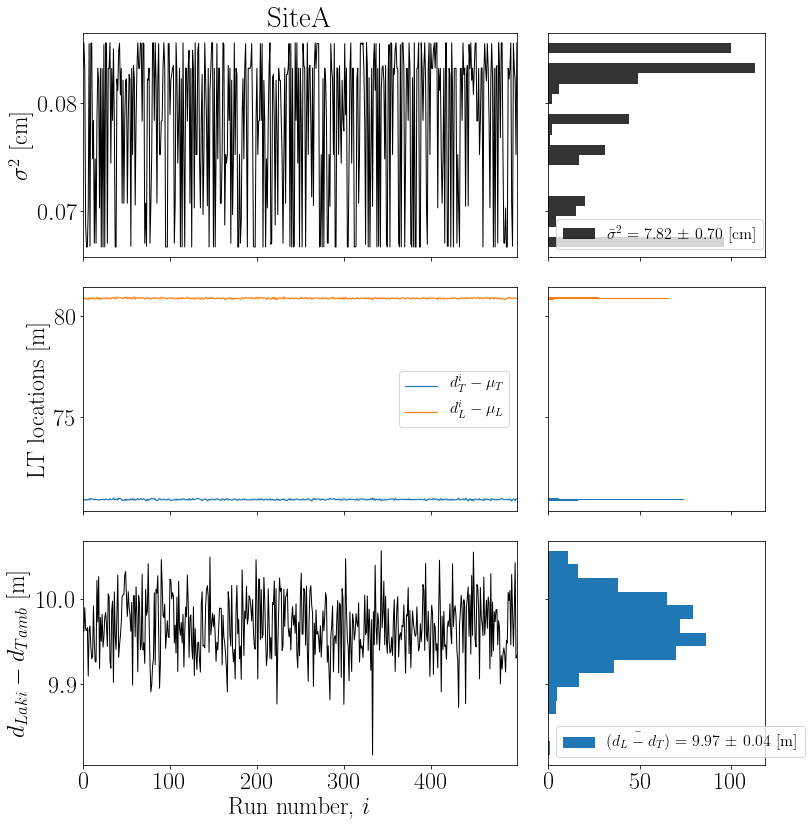

In [154]:
x = np.arange(0,len(diffLensUse))

sigmaMean = np.mean(diffLensUse)*100
sigmaSTD = np.std(diffLensUse)*100
sigmaMean_LT = np.mean(dLakis-dTambs)
sigmaSTD_LT = np.std(dLakis-dTambs)

fig, ax = plt.subplots(3,2,gridspec_kw={'width_ratios':[2,1]},figsize=(12,12), sharex='col', sharey='row')

mpl.rcParams['font.size'] = 24

ax[0,0].plot(x,diffLensUse,c='k',lw=1)#,marker='.',ls='None')
ax[0,0].set(xlim=(min(x),max(x)), ylabel='$\sigma^2$ [cm]', title=site)
ax[0,1].hist(diffLensUse, bins=20, orientation="horizontal", color='k',alpha=0.8, label=r'$\bar\sigma^2 =$ ' + f'{sigmaMean:.2f} $\pm$ {sigmaSTD:.2f} [cm]');
#ax[0,1].set(xlabel='Counts')
ax[0,1].legend(fontsize=16, loc='lower left')

ax[1,0].plot(x,dTambsUse,lw=1.2, label='$d_{T}^i-\mu_{T}$')
ax[1,0].plot(x,dLakisUse,lw=1.2,  label='$d_{L}^i-\mu_{L}$')
ax[1,0].set(xlim=(min(x),max(x)), ylabel='LT locations [m]')
ax[1,0].legend(fontsize=16)
ax[1,1].hist(dTambsUse, bins=15, orientation="horizontal")#, label=f'$\mu_T = $ {mu1:.2f} $\pm$ {sig1:.2f}');
ax[1,1].hist(dLakisUse, bins=15, orientation="horizontal")#, label=f'$\mu_L = $ {mu2:.2f} $\pm$ {sig2:.2f}');
#ax[1,1].legend(fontsize=16, loc='center left')

ax[2,0].plot(x,dLakisUse-dTambsUse,c='k',lw=1)
ax[2,0].set(xlim=(min(x),max(x)), xlabel='Run number, $i$', ylabel='$d_{Laki}-d_{Tamb}$ [m]')
ax[2,1].hist(dLakisUse-dTambsUse, bins=15, orientation="horizontal", label=r'$\bar{(d_{L}-d_{T})} =$ ' + f'{sigmaMean_LT:.2f} $\pm$ {sigmaSTD_LT:.2f} [m]')
ax[2,1].legend(fontsize=16, loc='lower left')

fig.tight_layout()

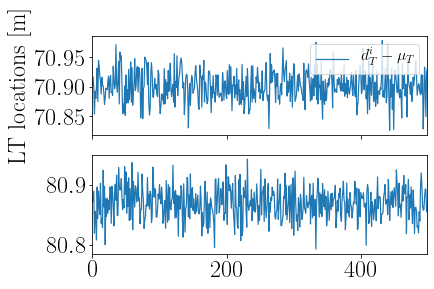

In [153]:
fig, (ax, ax2) = plt.subplots(2,1,sharex=True)


ax.plot(x,dTambsUse,lw=1.2, label='$d_{T}^i-\mu_{T}$')
ax2.plot(x,dLakisUse,lw=1.2,  label='$d_{L}^i-\mu_{L}$')
ax.set(xlim=(min(x),max(x)), ylabel='LT locations [m]')
ax.legend(fontsize=16)
#ax[1,1].hist(dTambsUse, bins=15, orientation="horizontal")#, label=f'$\mu_T = $ {mu1:.2f} $\pm$ {sig1:.2f}');
#ax[1,1].hist(dLakisUse, bins=15, orientation="horizontal")#, label=f'$\mu_L = $ {mu2:.2f} $\pm$ {sig2:.2f}');


In [54]:
if saveFigs:
    fig.savefig(pathFigures + site + '_Vary_LandT_2mnth_DCT.png', bbox_inches='tight')

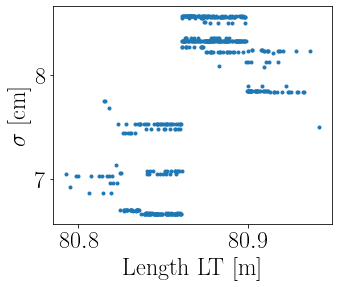

In [26]:
fig, ax = plt.subplots(figsize=(5,4))
plt.plot(dLakisUse, diffLensUse*100,'.')
ax.set(xlabel='Length LT [m]', ylabel='$\sigma$ [cm]');

#### Spectral transform: NDCT

In [42]:
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'
site = 'Crete'
diffLens, dTambs, dLakis = np.array(pd.read_csv(pathResults + site+'_diffLens_GaussDistwDepths_sigNmonths2_NDCT2.csv', ' ', header=None))

from scipy import stats
from scipy.stats import binom, poisson, norm

In [43]:
sigMin = 0.0
sigMax = 0.15

diffLensUse = diffLens[(diffLens>sigMin) & (diffLens < sigMax)]
dTambsUse = dTambs[(diffLens>sigMin) & (diffLens < sigMax)]
dLakisUse = dLakis[(diffLens>sigMin) & (diffLens < sigMax)]
#diffLensUse[diffLensUse<0.04] = 0.047


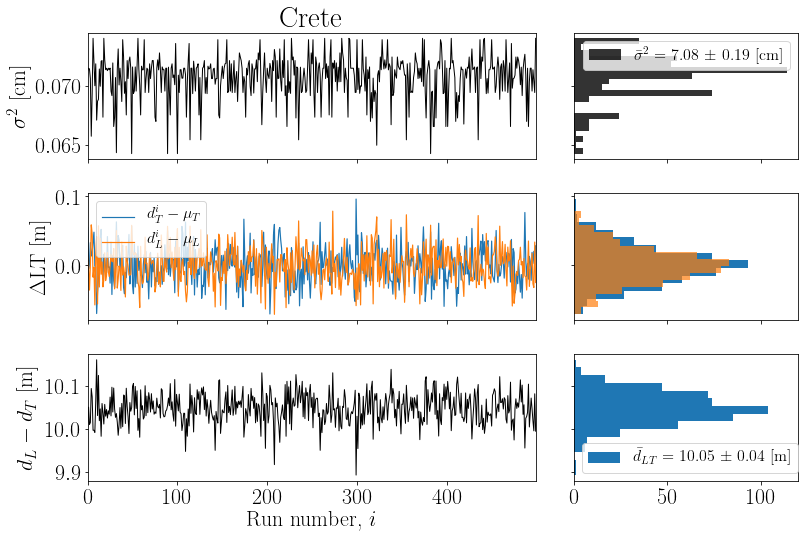

In [44]:
x = np.arange(0,len(diffLensUse))

sigmaMean = np.mean(diffLensUse)*100
sigmaSTD = np.std(diffLensUse)*100
sigmaMean_LT = np.mean(dLakis-dTambs)
sigmaSTD_LT = np.std(dLakis-dTambs)

fig, ax = plt.subplots(3,2,gridspec_kw={'width_ratios':[2,1]},figsize=(12,8), sharex='col', sharey='row')

mpl.rcParams['font.size'] = 24

ax[0,0].plot(x,diffLensUse,c='k',lw=1)#,marker='.',ls='None')
ax[0,0].set(xlim=(min(x),max(x)), ylabel='$\sigma^2$ [cm]', title=site)
ax[0,1].hist(diffLensUse, bins=20, orientation="horizontal", color='k',alpha=0.8, label=r'$\bar\sigma^2 =$ ' + f'{sigmaMean:.2f} $\pm$ {sigmaSTD:.2f} [cm]');
#ax[0,1].set(xlabel='Counts')
ax[0,1].legend(fontsize=16, loc='upper right')

ax[1,0].plot(x,dTambsUse-np.mean(dTambsUse),lw=1.2, label='$d_{T}^i-\mu_{T}$')
ax[1,0].plot(x,dLakisUse-np.mean(dLakisUse),lw=1.2,  label='$d_{L}^i-\mu_{L}$')
ax[1,0].set(ylabel='$\Delta$LT [m]')
ax[1,0].legend(fontsize=16)
ax[1,1].hist(dTambsUse-np.mean(dTambsUse), bins=15, orientation="horizontal")#, label=f'$\mu_T = $ {mu1:.2f} $\pm$ {sig1:.2f}');
ax[1,1].hist(dLakisUse-np.mean(dLakisUse), bins=15, orientation="horizontal", alpha=0.7)#, label=f'$\mu_L = $ {mu2:.2f} $\pm$ {sig2:.2f}');
#ax[1,1].legend(fontsize=16, loc='center left')

ax[2,0].plot(x,dLakisUse-dTambsUse,c='k',lw=1)
ax[2,0].set(xlim=(min(x),max(x)), xlabel='Run number, $i$', ylabel='$d_{L}-d_{T}$ [m]')
ax[2,1].hist(dLakisUse-dTambsUse, bins=15, orientation="horizontal", label=r'$\bar{d}_{LT} =$ ' + f'{sigmaMean_LT:.2f} $\pm$ {sigmaSTD_LT:.2f} [m]')
ax[2,1].legend(fontsize=16, loc='lower left')

fig.tight_layout()

In [45]:
if saveFigs:
    fig.savefig(pathFigures + site + '_Vary_LandT_2mnth_NDCT.pdf', bbox_inches='tight')

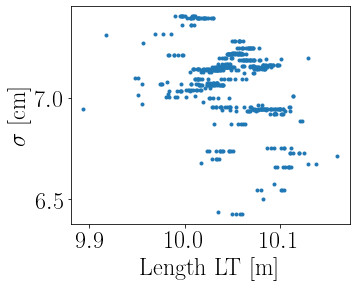

In [46]:
fig, ax = plt.subplots(figsize=(5,4))
plt.plot(dLakisUse-dTambsUse, diffLensUse*100,'.')
ax.set(xlabel='Length LT [m]', ylabel='$\sigma$ [cm]');

# Spectral Transforms Effect on Diffusion Length

In [47]:
site = 'Crete'
N_InInt = 33

CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']


core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb = CoreSpecs['dTamb']
dLaki = CoreSpecs['dLaki']
accum0 = CoreSpecs['Accum0']
accumIE = CoreSpecs['Accum1']
Temp0 = CoreSpecs['T0']

DataAll = GetCoreData(site, 'Alphabet')

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth = data_d18O['depth']
d18O = data_d18O['d18O']

depth_LT = data_d18O_LT['depth']
d18O_LT = data_d18O_LT['d18O']


No ECM file found, setting empty df instead


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-47-d94deb82c1b0>:17: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  DataAll = GetCoreData(site, 'Alphabet')


### Sigma estimate differences

In [48]:
dataAll = pd.DataFrame({'depth':depth,'d18O':d18O}, index=None)
Trans = ['DCT', 'NDCT', 'FFT']

instDCT = BackDiffuse(site, dataAll, CoresSpecs, dTamb, dLaki, N_InInt, diffLenData=data_diff_LT[['Depth','sigma_o18']], densData=data_dens_LT, Dist=30, transType = Trans[0])

depDCT, datDCT, diffDCT, PsDCT, TsDCT, patsDCT = instDCT.BackDiffused_constraints()

ALT file exists. Loading ALT data.
Sigma fit: 7.15
Min sigma analyt: 7.28
Starting sigma: 5.15 [cm]
6.0
Final sigma: 7.16 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.013


In [49]:
instNDCT = BackDiffuse(site, dataAll, CoresSpecs, dTamb, dLaki, N_InInt, diffLenData=data_diff_LT[['Depth','sigma_o18']], densData=data_dens_LT, Dist=30, transType = Trans[1])

depNDCT, datNDCT, diffNDCT, PsNDCT, TsNDCT, patsNDCT = instNDCT.BackDiffused_constraints()

ALT file exists. Loading ALT data.
Sigma fit: 7.20
Min sigma analyt: 7.28
Starting sigma: 5.20 [cm]
6.0
Final sigma: 7.22 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.013


In [50]:
instFFT = BackDiffuse(site, dataAll, CoresSpecs, dTamb, dLaki, N_InInt, diffLenData=data_diff_LT[['Depth','sigma_o18']], densData=data_dens_LT, Dist=30, transType = Trans[2])

depFFT, datFFT, diffFFT, PsFFT, TsFFT, patsFFT = instFFT.BackDiffused_constraints()

ALT file exists. Loading ALT data.
Sigma fit: 7.14
Min sigma analyt: 7.28
Starting sigma: 5.14 [cm]
6.0
Final sigma: 7.03 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.013


In [51]:
diffFFT

0.07030461258716741

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


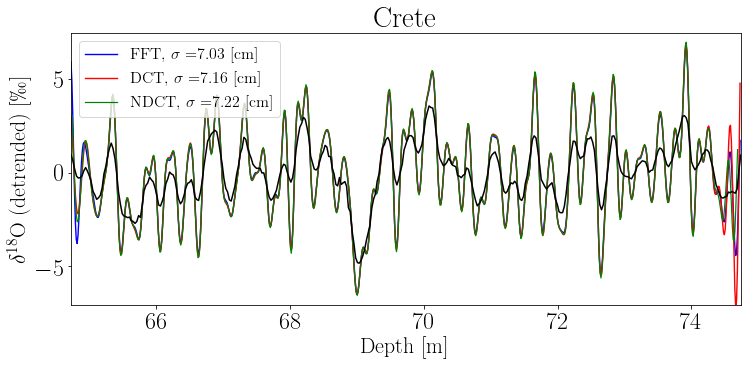

In [52]:
fig, ax = plt.subplots(figsize=(12,5))


ax.plot(depFFT,datFFT, label='FFT, $\sigma=$'+f'{diffFFT*100:.2f} [cm]', c='b', lw=1.4)
ax.plot(depDCT,datDCT, label='DCT, $\sigma=$'+f'{diffDCT*100:.2f} [cm]', c='r', lw=1.4)
ax.plot(depNDCT,datNDCT, label='NDCT, $\sigma=$'+f'{diffNDCT*100:.2f} [cm]', c='g', lw=1.2)
ax.plot(depth_LT,d18O_LT - np.mean(d18O_LT), c='k', lw=1.5)

ax.set_xlabel('Depth [m]', fontsize=22)
ax.set_ylabel('$\delta^{18}$O (detrended) [$\permil$]', fontsize=22)
ax.set(xlim=(min(depth_LT), max(depth_LT)), ylim=(min(datNDCT)-0.5, max(datNDCT)+0.5), title=site)
ax.legend(fontsize=16);

In [53]:
saveFigs = True
pathFigures = '/home/thea/MesterTesen/WrittenWork/Figures/'
if saveFigs:
    fig.savefig(pathFigures + site + '_SpecTrans_VisInspection.pdf', bbox_inches='tight')

### Speed up/slow down

In [54]:
site = 'Crete'
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'

dTambs,dLakis, diffLenDCTs, diffLenNDCTs, diffLenFFTs, totalDCTs, totalNDCTs, totalFFTs = np.array(pd.read_csv(pathResults + site+'_diffLens_SpecTransEffect_wTiming_varyLandT.csv', ' ', header=None))

from scipy import stats
from scipy.stats import binom, poisson, norm

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


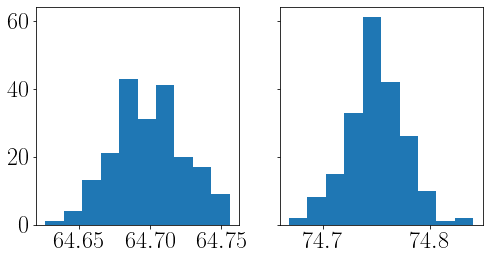

In [55]:
fig, ax = plt.subplots(1,2,figsize=(8,4), sharey=True)
ax[0].hist(dTambs, bins=10);
ax[1].hist(dLakis, bins=10);

<bound method Figure.tight_layout of <Figure size 864x432 with 2 Axes>>

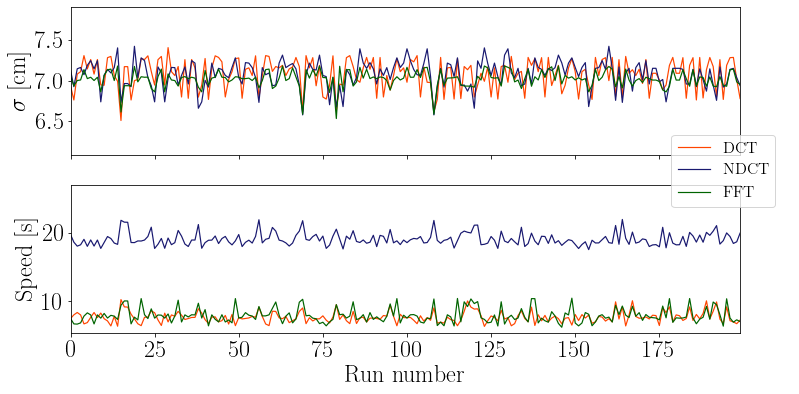

In [56]:
x = np.arange(0,len(dTambs))


fig, ax = plt.subplots(2,1, figsize=(12,6), sharex=True)
sigDCT = ax[0].plot(x,diffLenDCTs*100, label='DCT', c='orangered', lw=1.2)
sigNDCT = ax[0].plot(x,diffLenNDCTs*100, label='NDCT', c='midnightblue', lw=1.2)
sigFFT = ax[0].plot(x,diffLenFFTs*100, label='FFT', c='darkgreen', lw=1.2)
ax[0].set(xlim=(min(x),max(x)), ylim=(min(diffLenNDCTs*100)-0.5,max(diffLenDCTs*100)+0.5), ylabel = '$\sigma$ [cm]')

tDCT = ax[1].plot(x, totalDCTs, c='orangered', lw=1.2)
tNDCT = ax[1].plot(x, totalNDCTs, c='midnightblue', lw=1.2)
tFFT = ax[1].plot(x, totalFFTs, c='darkgreen', lw=1.2)
ax[1].set(xlim=(min(x),max(x)), ylim=(min(totalDCTs)-1,max(totalNDCTs)+5), xlabel='Run number', ylabel='Speed [s]')

handles, labels = ax[0].get_legend_handles_labels()
#fig.legend((sigDCT, sigNDCT, sigFFT), ('DCT', 'NDCT','FFT'))#, loc = (0.5, 0), ncol=5 )
fig.legend(handles,labels, fontsize=16, loc=(0.84,0.475))
fig.tight_layout

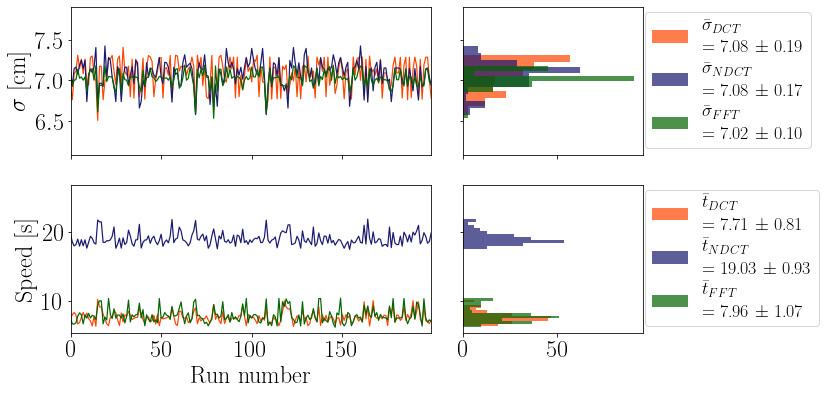

In [57]:
x = np.arange(0,len(dTambs))


fig, ax = plt.subplots(2,2, figsize=(12,6), sharex='col', sharey='row', gridspec_kw={'width_ratios':[2,1]})
sigDCT = ax[0,0].plot(x,diffLenDCTs*100, label=r'$\bar{\sigma}_{DCT}=$', c='orangered', lw=1.2)
sigNDCT = ax[0,0].plot(x,diffLenNDCTs*100, label=r'$\sigma_{NDCT}$', c='midnightblue', lw=1.2)
sigFFT = ax[0,0].plot(x,diffLenFFTs*100, label=r'$\sigma_{FFT}$', c='darkgreen', lw=1.2)
ax[0,0].set(xlim=(min(x),max(x)), ylim=(min(diffLenNDCTs*100)-0.5,max(diffLenDCTs*100)+0.5), ylabel = '$\sigma$ [cm]')
ax[0,1].hist(diffLenDCTs*100, orientation='horizontal', alpha=0.7, color='orangered', label=r'$\bar{\sigma}_{DCT}$' + f'\n = {np.mean(diffLenDCTs*100):.2f} $\pm$ {np.std(diffLenDCTs*100):.2f}')
ax[0,1].hist(diffLenNDCTs*100, orientation='horizontal', alpha=0.7, color='midnightblue', label=r'$\bar{\sigma}_{NDCT}$' + f'\n = {np.mean(diffLenNDCTs*100):.2f} $\pm$ {np.std(diffLenNDCTs*100):.2f}')
ax[0,1].hist(diffLenFFTs*100, orientation='horizontal', alpha=0.7, color='darkgreen', label=r'$\bar{\sigma}_{FFT}$' + f'\n = {np.mean(diffLenFFTs*100):.2f} $\pm$ {np.std(diffLenFFTs*100):.2f}')
ax[0,1].legend(fontsize=18, loc = (1.01,0.05))

tDCT = ax[1,0].plot(x, totalDCTs, c='orangered', lw=1.2)
tNDCT = ax[1,0].plot(x, totalNDCTs, c='midnightblue', lw=1.2)
tFFT = ax[1,0].plot(x, totalFFTs, c='darkgreen', lw=1.2)
ax[1,0].set(xlim=(min(x),max(x)), ylim=(min(totalDCTs)-1,max(totalNDCTs)+5), xlabel='Run number', ylabel='Speed [s]')
ax[1,1].hist(totalDCTs, orientation='horizontal', alpha=0.7, color='orangered',label=r'$\bar{t}_{DCT}$'+f'\n = {np.mean(totalDCTs):.2f} $\pm$ {np.std(totalDCTs):.2f}')
ax[1,1].hist(totalNDCTs, orientation='horizontal', alpha=0.7, color='midnightblue',label=r'$\bar{t}_{NDCT}$'+f'\n = {np.mean(totalNDCTs):.2f} $\pm$ {np.std(totalNDCTs):.2f}')
ax[1,1].hist(totalFFTs, orientation='horizontal', alpha=0.7, color='darkgreen',label=r'$\bar{t}_{FFT}$'+f'\n = {np.mean(totalFFTs):.2f} $\pm$ {np.std(totalFFTs):.2f}')
ax[1,1].legend(fontsize=18, loc = (1.01,0.05))
#handles, labels = ax[0,0].get_legend_handles_labels()
#fig.legend((sigDCT, sigNDCT, sigFFT), ('DCT', 'NDCT','FFT'))#, loc = (0.5, 0), ncol=5 )
#fig.legend(handles,labels, fontsize=16, loc=(0.84,0.475))
fig.tight_layout()

In [59]:
if saveFigs:
    fig.savefig(pathFigures + site + '_SpecTrans_Speed.pdf', bbox_inches='tight')

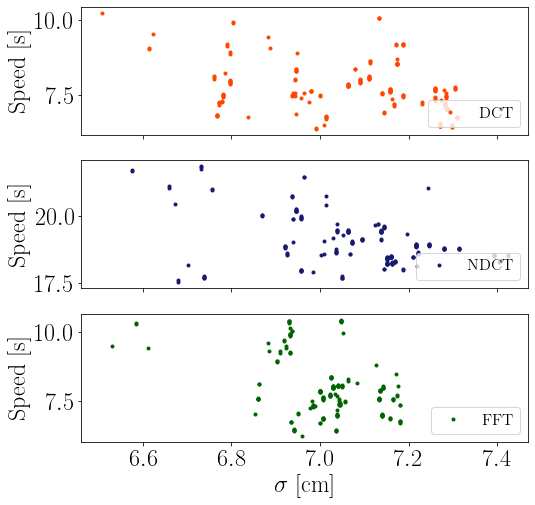

In [60]:
fig, axs = plt.subplots(3,1, figsize=(8,8), sharex=True)

axs[0].plot(diffLenDCTs*100, totalDCTs,'.', c='orangered', label='DCT')
axs[1].plot(diffLenNDCTs*100, totalNDCTs,'.', c='midnightblue', label='NDCT')
axs[2].plot(diffLenFFTs*100, totalFFTs,'.', c='darkgreen', label='FFT')
axs[2].set(xlabel='$\sigma$ [cm]', ylabel='Speed [s]')
axs[1].set(ylabel='Speed [s]')
axs[0].set(ylabel='Speed [s]')

axs[0].legend(fontsize=16, loc='lower right')
axs[1].legend(fontsize=16, loc='lower right')
axs[2].legend(fontsize=16, loc='lower right')

# Interpolation bf. vs. Diffusion Length

In [61]:
site = 'Crete'
N_InInt = 33

CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']


core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb_in = CoreSpecs['dTambCor']
dLaki_in = CoreSpecs['dLakiCor']

DataAll = GetCoreData(site, 'Alphabet')

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth = data_d18O['depth']
d18O = data_d18O['d18O']

depth_LT = data_d18O_LT['depth']
d18O_LT = data_d18O_LT['d18O']


No ECM file found, setting empty df instead


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-61-fb4db3dfee29>:14: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  DataAll = GetCoreData(site, 'Alphabet')


In [62]:
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'

data = pd.read_csv(pathResults + site +'_DiffLensVdelta_InterpBF_const'+'.txt', '\t')


## Quantitatively, delta vs. diff len

In [78]:
sites = ['SiteA', 'SiteB','SiteD','SiteE','SiteG', 'Crete']

<ipython-input-79-1e8d2431e074>:16: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  DataAll = GetCoreData(site, 'Alphabet')



SiteA
Min 1.0
Max 10.60200668896321

SiteB
Min 1.0
Max 11.74247491638795

SiteD
Min 1.0
Max 12.0

SiteE
Min 1.0
Max 11.41137123745819

SiteG
Min 1.0
Max 10.344481605351161
No ECM file found, setting empty df instead

Crete
Min 1.0
Max 11.043478260869561


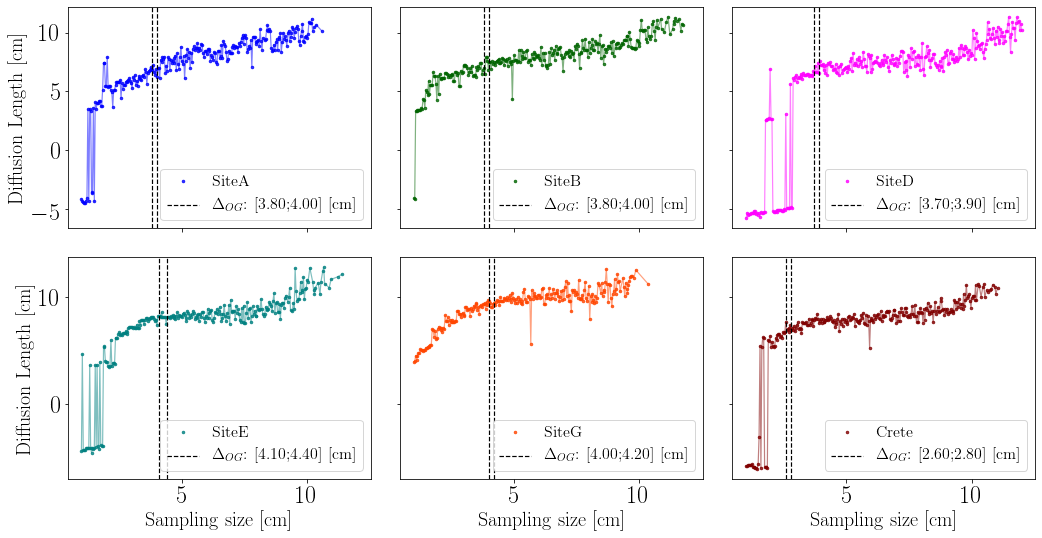

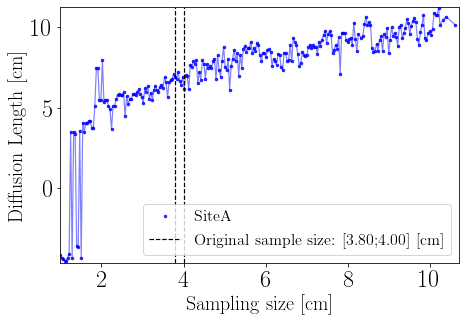

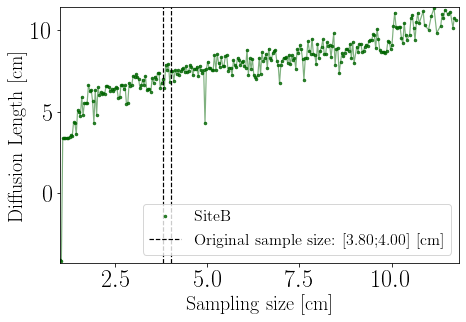

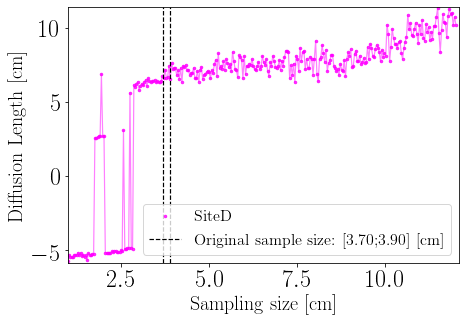

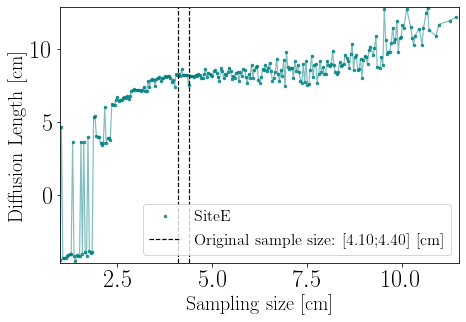

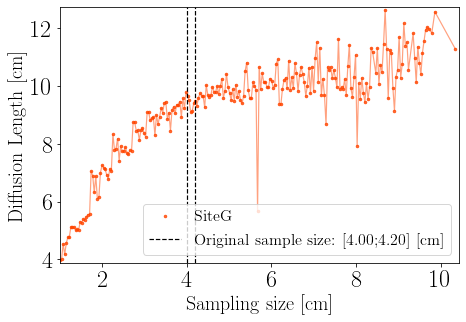

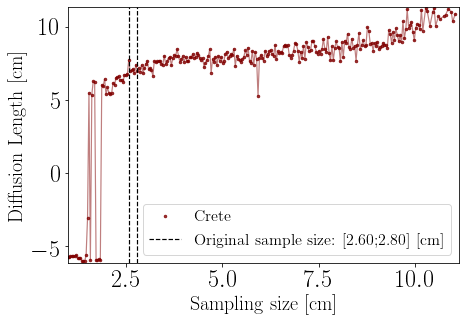

In [79]:
fig, axs = plt.subplots(2,int(np.ceil(len(sites)/2)), figsize=(15,8), sharey='row',sharex=True)
colors = ['blue','darkgreen','magenta','teal','orangered', 'maroon']

for i in range(len(sites)):
    site = sites[i]
    
    
    CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

    coreNames = CoresSpecs['CoreName']


    core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
    CoreSpecs = CoresSpecs.iloc[core_idx]

    DataAll = GetCoreData(site, 'Alphabet')

    data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]

    depth_LT = data_d18O_LT['depth']
    data_LT = data_d18O_LT['d18O']
    
    
    dataAll = pd.DataFrame({'depth':depth_LT,'d18O':d18O_LT}, index=None)

    inst = BackDiffuse(site, dataAll, CoresSpecs, dTamb_in, dLaki_in, N_InInt, diffLenData=data_diff_LT[['Depth','sigma_o18']], densData=data_dens_LT)

    theoMinM, theoMaxM = inst.diffLenEstimateHL()
    theoMin = theoMinM*100
    theoMax = theoMaxM*100
    
    df_Site = pd.read_csv(pathResults + site + '_DiffLensVdelta_InterpBF_const.txt','\t')
    sigs = df_Site['diffLens']*100
    dels = df_Site['deltas']*100
    sigs0 = sigs[sigs>-100]
    dels0 = dels[sigs>-100]
    print('\n'+site)
    print('Min '+f'{min(dels0)}')
    print('Max '+f'{max(dels0)}')
    
    ax = axs.flatten()[i]
    
    ax.plot(dels0, sigs0, lw=1.2,marker='.', ls='None', ms=5, c=colors[i], alpha=0.8, label=site)
    ax.plot(dels0, sigs0, lw=1.2, c=colors[i], alpha=0.5)
    ax.axvline(max(np.diff(depth_LT))*100, ls='--',c='k', lw=1.2, label='$\Delta_{OG}$'+f': [{min(np.diff(depth_LT))*100:.2f};{max(np.diff(depth_LT))*100:.2f}] [cm]')
    ax.axvline(min(np.diff(depth_LT))*100, ls='--',c='k', lw=1.2)
    #ax.axhline(theoMin, ls='--', c='b',lw=1.2, label=f'Theo. sigma: [{theoMin:.2f};{theoMax:.2f}] [cm]')
    #ax.axhline(theoMax, ls='--', c='b',lw=1.2)
    ax.legend(fontsize=16, loc='lower right')
    #ax.set(ylim=(min(sigs0)-0.1,max(sigs0)+0.1), xlim=(min(dels0),max(dels0)+0.1))
    
    if i in [3,4,5]:
        ax.set_xlabel('Sampling size [cm]', fontsize=20)
    if i in [0,3]:
        ax.set_ylabel('Diffusion Length [cm]', fontsize=20)#, xlim=(min(dels),0.055))
    
    fig1, ax1 = plt.subplots(figsize=(7,5))
    ax1.plot(dels0, sigs0, lw=1.2,marker='.', ls='None', ms=5, c=colors[i], alpha=0.8, label=site)
    ax1.plot(dels0, sigs0, lw=1.2, c=colors[i], alpha=0.5)
    ax1.axvline(max(np.diff(depth_LT))*100, ls='--',c='k', lw=1.2, label=f'Original sample size: [{min(np.diff(depth_LT))*100:.2f};{max(np.diff(depth_LT))*100:.2f}] [cm]')
    ax1.axvline(min(np.diff(depth_LT))*100, ls='--',c='k', lw=1.2)
    #ax1.axhline(theoMin, ls='--', c='b',lw=1.2, label=f'Theo. sigma: [{theoMin:.2f};{theoMax:.2f}] [cm]')
    #ax1.axhline(theoMax, ls='--', c='b',lw=1.2)
    ax1.legend(fontsize=16, loc='lower right')
    ax1.set(ylim=(min(sigs0)-0.1,max(sigs0)+0.1), xlim=(min(dels0),max(dels0)+0.1))
    ax1.set_xlabel('Sampling size [cm]', fontsize=20)
    ax1.set_ylabel('Diffusion Length [cm]', fontsize=20)#, xlim=(min(dels),0.055))
    fig1.tight_layout()
    
    if saveFigs:
        fig1.savefig(pathFigures+site+'_DiffLenVdelta_InterpBF_const.pdf',bbox_inches='tight')
        
    #axs.flatten()[-1].plot(dels0, sigs0, lw=1.2,marker='.', ls='None', ms=5, c=colors[i], alpha=0.8, label=site)
    #axs.flatten()[-1].plot(dels0, sigs0, lw=1.2, c=colors[i], alpha=0.5)
    #axs.flatten()[-1].set_xlabel('Sampling size [cm]', fontsize=20)
    #axs.flatten()[-1].set_ylabel('Diffusion Length [cm]', fontsize=20)
    #axs.flatten()[-1].legend(fontsize=16)
fig.tight_layout()
if saveFigs:
    fig.savefig(pathFigures+'AllCores_DiffLenVdelta_InterpBF_const.pdf',bbox_inches='tight')

## Qualitatively, focus on specific resampling

In [80]:
j = -1
interpType = 'CubicSpline'
deltaMins = [0.015,0.015,0.015,0.015,0.02]
deltaMaxs = [0.1,0.1,0.12,0.1,0.1]

    # Load data
site = sites[j]
delta_arr = np.linspace(deltaMins[j],deltaMaxs[j],4)


N_InInt = 33

print(f'\n {site}')
CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']


core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb = CoreSpecs['dTamb']
dLaki = CoreSpecs['dLaki']
accum0 = CoreSpecs['Accum0']
accumIE = CoreSpecs['Accum1']
Temp0 = CoreSpecs['T0']

DataAll = GetCoreData(site, 'Alphabet')

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth = data_d18O['depth']
d18O = data_d18O['d18O']

depth_LT = data_d18O_LT['depth']
d18O_LT = data_d18O_LT['d18O']

isoData = data_d18O


interval = np.array([min(depth_LT), max(depth_LT)])
interpTypeAll = interpType

diffLens = np.zeros(len(delta_arr))
Npeaks = np.zeros(len(delta_arr))
depths_BD = []
datas_BD = []
depth_ints = []
data_ints = []
peakss = []
troughss = []
patss = []

for i in range(len(delta_arr)):
    print(f'\nRun {i}')
    print(f'Delta: {delta_arr[i]:.3f}\n')
    inst = Interpolation(depth_LT, pd.Series(d18O_LT), interval, interpTypeAll, DeltaInput=True, samplingSize=delta_arr[i])
    depth_LT_int1, d18O_LT_int1, Delta = inst()

    depth_ints.append(depth_LT_int1)
    data_ints.append(d18O_LT_int1)

    dataAll = pd.DataFrame({'depth':depth_LT_int1,'d18O':d18O_LT_int1}, index=None)

    inst = BackDiffuse(site, dataAll, CoresSpecs, dTamb, dLaki, N_InInt, diffLenData=data_diff_LT[['Depth','sigma_o18']], densData=data_dens_LT)
    depth1, data, diffLen, Peaks, Ts, pats = inst.BackDiffused_constraints(interpAfterDecon=False)
    # depth1, data, diffLen, peaks, arr_DiffLens, arr_Npeaks, arr_depth, arr_data = inst.backDiffused(theoDiffLen=True,print_Npeaks=False, diffLenStart_In=0.005, diffLenEnd_In=0.15, interpAfterDecon=False, newDelta=0.005)

    Npeaks[i] = len(Peaks)
    diffLens[i] = diffLen
    depths_BD.append(depth1)
    datas_BD.append(data)
    peakss.append(Peaks)
    troughss.append(Ts)
    patss.append(patss)


 Crete
No ECM file found, setting empty df instead

Run 0
Delta: 0.020

ALT file exists. Loading ALT data.
Sigma fit: 6.55
Min sigma analyt: 7.28
Starting sigma: 4.55 [cm]
7.0


<ipython-input-80-48cd91e958b7>:27: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  DataAll = GetCoreData(site, 'Alphabet')


Final sigma: 5.83 [cm]
Final # of peaks: 33
Delta: 0.020
Delta new: 0.020

Run 1
Delta: 0.047

ALT file exists. Loading ALT data.
Sigma fit: 7.81
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
3.0
Final sigma: 8.33 [cm]
Final # of peaks: 33
Delta: 0.047
Delta new: 0.047

Run 2
Delta: 0.073

ALT file exists. Loading ALT data.
Sigma fit: 8.00
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
2.0
Final sigma: 8.85 [cm]
Final # of peaks: 33
Delta: 0.074
Delta new: 0.074

Run 3
Delta: 0.100

ALT file exists. Loading ALT data.
Sigma fit: 7.93
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
1.0
Final sigma: 9.58 [cm]
Final # of peaks: 33
Delta: 0.101
Delta new: 0.101


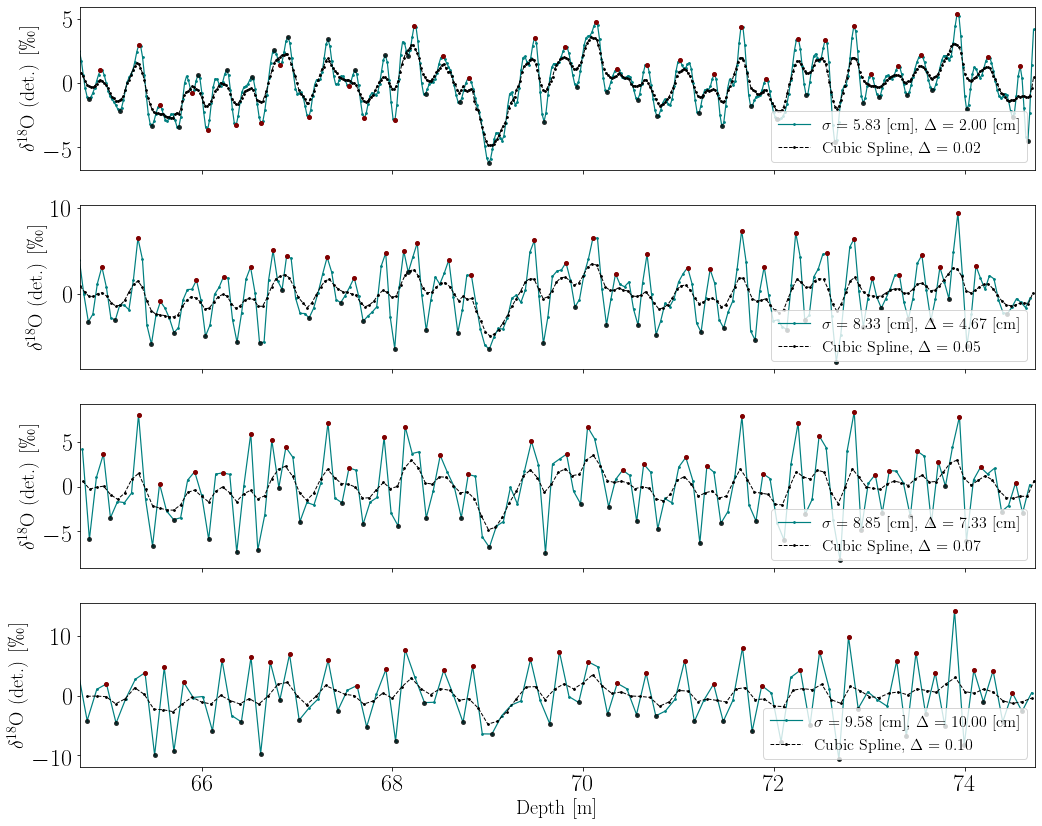

In [81]:
fig, ax = plt.subplots(len(delta_arr),1,figsize=(15,12), sharex=True)
for i in range(len(delta_arr)):
    depth = depths_BD[i]
    data = datas_BD[i]
    ax[i].plot(depth, data, lw=1.2, c='teal', marker='.', ms=3.5, label=f'$\sigma=$ {diffLens[i]*100:.2f} [cm], $\Delta=$ {delta_arr[i]*100:.2f} [cm]')
    ax[i].plot(depth_ints[i], data_ints[i]-np.mean(data_ints[i]), lw=1, ls='--', c='k', marker='.', ms=3.5, label=f'Cubic Spline, $\Delta=$ {depth_ints[i][1]-depth_ints[i][0]:.2f}')
    ax[i].plot(depth[peakss[i]],data[peakss[i]], ls='None', marker='.', c = 'maroon', ms=8)#, label=f'$N_P=${len(peakss[i])}, $N_T=${len(troughss[i])}')
    ax[i].plot(depth[troughss[i]],data[troughss[i]], ls='None', marker='.', c = 'k', alpha=0.7, ms=8)
    ax[i].set_ylabel('$\delta^{18}$O (det.) [$\permil$]', fontsize=20)
#    if patss[i] == 1.0:
#        ax[i].plot(depth[peakss[i]],data[peakss[i]], ls='None', marker='.', c = 'maroon', ms=8, label=f'$N_P=${len(peakss[i])}, $N_T=${len(troughss[i])}\n Pattern? Yes.')
#        ax[i].plot(depth[troughss[i]],data[troughss[i]], ls='None', marker='.', c = 'k', alpha=0.7, ms=8)
#    else:
#        ax[i].plot(depth[peakss[i]],data[peakss[i]], ls='None', marker='.', c = 'maroon', ms=8, label=f'$N_P=${len(peakss[i])}, $N_T=${len(troughss[i])}\n Pattern? No.')
#        ax[i].plot(depth[troughss[i]],data[troughss[i]], ls='None', marker='.', c = 'k', alpha=0.7, ms=8)
#        
    ax[i].legend(fontsize=16, loc='lower right')

ax[-1].set_xlabel('Depth [m]', fontsize=20)
ax[-1].set_ylabel('$\delta^{18}$O (det.) [$\permil$]', fontsize=20)
ax[-1].set(xlim=(min(depth_LT),max(depth_LT)),);
fig.tight_layout()

if saveFigs:
    fig.savefig(pathFigures+site+'_InterpBF_SpecificResamplings.pdf',bbox_inches='tight')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


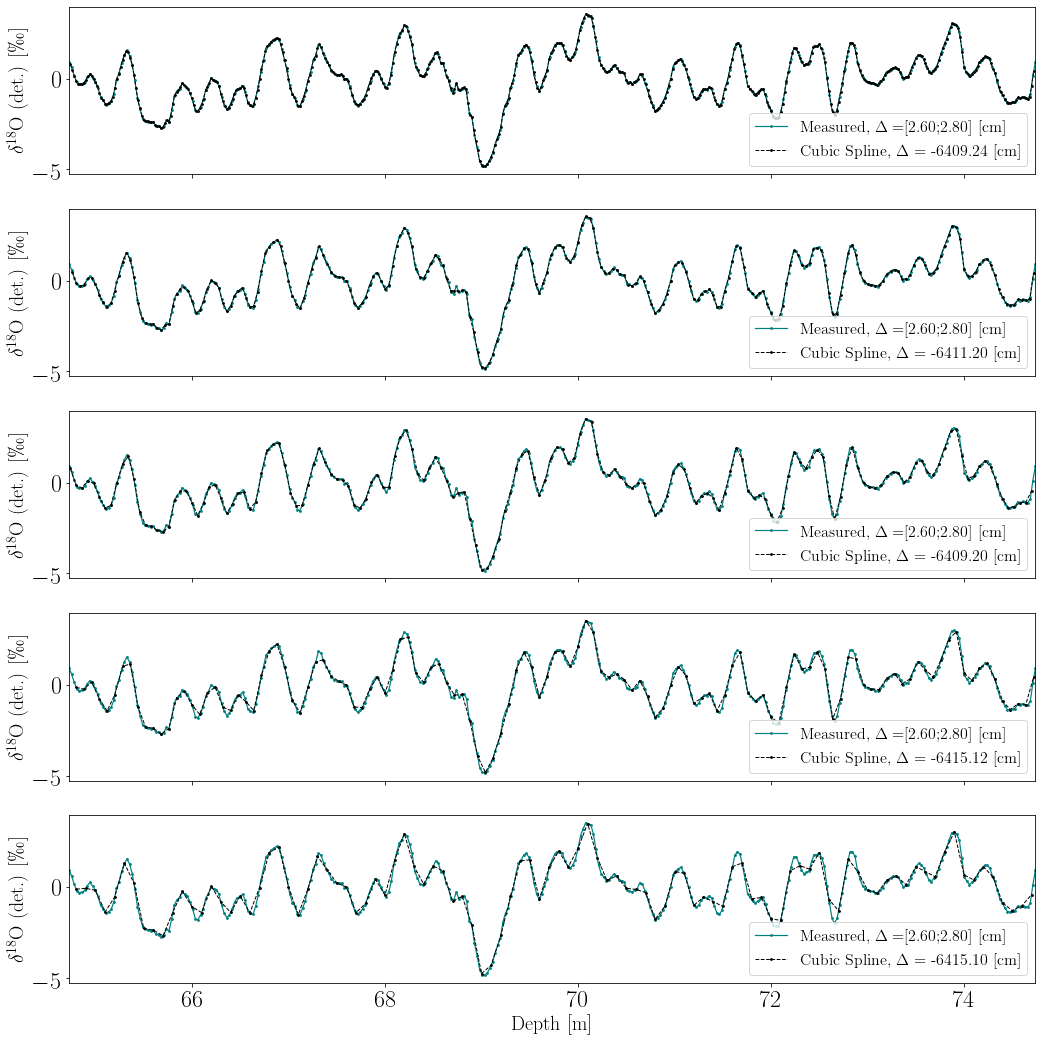

In [73]:
fig, ax = plt.subplots(len(delta_arr),1,figsize=(15,15), sharex=True)
for i in range(len(delta_arr)):
    #depth = depths_BD[i]
    #data = datas_BD[i]
    ax[i].plot(depth_LT, d18O_LT-np.mean(d18O_LT), lw=1.2, c='teal', marker='.', ms=3.5, label='Measured, $\Delta=$'+f'[{min(np.diff(depth_LT))*100:.2f};{max(np.diff(depth_LT))*100:.2f}] [cm]')
    ax[i].plot(depth_ints[i], data_ints[i]-np.mean(data_ints[i]), lw=1, ls='--', c='k', marker='.', ms=3.5, label=f'Cubic Spline, $\Delta=$ {depth_ints[i][1]-depth_ints[i][0]*100:.2f} [cm]')
    #ax[i].plot(depth[peakss[i]],data[peakss[i]], ls='None', marker='.', c = 'maroon', ms=8)#, label=f'$N_P=${len(peakss[i])}, $N_T=${len(troughss[i])}')
    #ax[i].plot(depth[troughss[i]],data[troughss[i]], ls='None', marker='.', c = 'k', alpha=0.7, ms=8)
    ax[i].set_ylabel('$\delta^{18}$O (det.) [$\permil$]', fontsize=20)
#    if patss[i] == 1.0:
#        ax[i].plot(depth[peakss[i]],data[peakss[i]], ls='None', marker='.', c = 'maroon', ms=8, label=f'$N_P=${len(peakss[i])}, $N_T=${len(troughss[i])}\n Pattern? Yes.')
#        ax[i].plot(depth[troughss[i]],data[troughss[i]], ls='None', marker='.', c = 'k', alpha=0.7, ms=8)
#    else:
#        ax[i].plot(depth[peakss[i]],data[peakss[i]], ls='None', marker='.', c = 'maroon', ms=8, label=f'$N_P=${len(peakss[i])}, $N_T=${len(troughss[i])}\n Pattern? No.')
#        ax[i].plot(depth[troughss[i]],data[troughss[i]], ls='None', marker='.', c = 'k', alpha=0.7, ms=8)
#        
    ax[i].legend(fontsize=16)

ax[-1].set_xlabel('Depth [m]', fontsize=20)
ax[-1].set_ylabel('$\delta^{18}$O (det.) [$\permil$]', fontsize=20)
ax[-1].set(xlim=(min(depth_LT),max(depth_LT)),);
fig.tight_layout()
if saveFigs:
    fig.savefig(pathFigures+site+'_InterpBF_SpecificResamplings_noBD.pdf',bbox_inches='tight')

# Interpolation af. vs. Diffusion Length

In [82]:
site = 'Crete'
N_InInt = 33

CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']


core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb_in = CoreSpecs['dTambCor']
dLaki_in = CoreSpecs['dLakiCor']

DataAll = GetCoreData(site, 'Alphabet')

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth = data_d18O['depth']
d18O = data_d18O['d18O']

depth_LT = data_d18O_LT['depth']
d18O_LT = data_d18O_LT['d18O']


No ECM file found, setting empty df instead


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-82-fb4db3dfee29>:14: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  DataAll = GetCoreData(site, 'Alphabet')


In [83]:
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'

data = pd.read_csv(pathResults + site +'_DiffLensVdelta_InterpAF_const'+'.txt', '\t')


## Quantitatively, delta vs diff len

In [76]:
delta_arr_in = np.arange(0.01,0.07,0.0002)
shift_in = 1.5
lSecs_in=7
sites = ['Crete']
for j in range(len(sites)):

        # Load data
    site = sites[j]
    N_InInt = 33

    print(f'\n {site}')
    CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

    coreNames = CoresSpecs['CoreName']


    core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
    CoreSpecs = CoresSpecs.iloc[core_idx]
    dTamb = CoreSpecs['dTamb']
    dLaki = CoreSpecs['dLaki']
    accum0 = CoreSpecs['Accum0']
    accumIE = CoreSpecs['Accum1']
    Temp0 = CoreSpecs['T0']

    DataAll = GetCoreData(site, 'Alphabet')

    data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
    data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
    data_dens = DataAll[4]; data_dens_LT = DataAll[5]
    data_diff = DataAll[6]; data_diff_LT = DataAll[7]


    depth = data_d18O['depth']
    d18O = data_d18O['d18O']

    depth_LT = data_d18O_LT['depth']
    d18O_LT = data_d18O_LT['d18O']
    isoData = data_d18O


    delta_arr = delta_arr_in
    diffLens = []
    #    depths = []
    #    datas = []
    #    peakss = []

    inst = BackDiffuse(site, data_d18O_LT, CoresSpecs, dTamb, dLaki, N_InInt, diffLenData=data_diff_LT[['Depth','sigma_o18']], densData=data_dens_LT)

    for i in range(len(delta_arr)):

        print(f'\n\t\tRun {i} of {len(delta_arr)}')
        try:
            depth1, data, diffLen, Peaks, Ts, pats = inst.BackDiffused_constraints(interpAfterDecon=True, newDelta=delta_arr[i])
        #        depths.append(depth1)
        #        datas.append(data)
            diffLens.append(diffLen)

        except:
            print('Error, moving on to next $\Delta$')
            diffLens.append(-1)
    df_Site = pd.DataFrame({'diffLens':diffLens, 'deltas':delta_arr})



 Crete
No ECM file found, setting empty df instead

		Run 0 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0


<ipython-input-76-5ce6cbc1a4b4>:25: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  DataAll = GetCoreData(site, 'Alphabet')


Final sigma: 7.26 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.010

		Run 1 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.26 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.010

		Run 2 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.26 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.010

		Run 3 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 4 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.26 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.011

		Run 5 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 6 of 300
ALT file exists. Loa

Final sigma: 7.28 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.019

		Run 44 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.28 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.019

		Run 45 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.28 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.019

		Run 46 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.30 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.019

		Run 47 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.27 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.019

		Run 48 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.27 [cm]
Fi

Final sigma: 7.43 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.027

		Run 87 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.45 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.027

		Run 88 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.33 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.028

		Run 89 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.64 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.028

		Run 90 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.71 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.028

		Run 91 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.89 [cm]
Fi

Error, moving on to next $\Delta$

		Run 136 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 137 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 138 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 139 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 140 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 141 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 142 of 300
ALT file exi

Error, moving on to next $\Delta$

		Run 189 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 190 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 191 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 192 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 193 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 194 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 195 of 300
ALT file exi

Error, moving on to next $\Delta$

		Run 242 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 243 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 244 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 245 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 246 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 247 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 248 of 300
ALT file exi

Error, moving on to next $\Delta$

		Run 295 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 296 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 297 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 298 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$

		Run 299 of 300
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Error, moving on to next $\Delta$


In [84]:
site = 'Crete'
df_Site = pd.read_csv(pathResults + site + '_DiffLensVdelta_InterpAF_const.txt','\t')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


[(0.0715513454409837, 0.0846171078006327)]

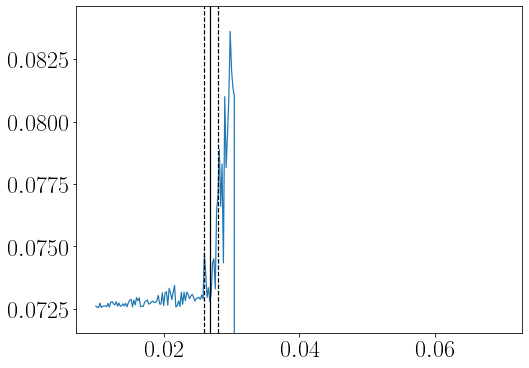

In [85]:
sigs = df_Site['diffLens']
dels = df_Site['deltas']

fig, ax = plt.subplots(figsize=(8,6))
#ax.plot(dels[sigs>0], sigs[sigs>0])
ax.plot(dels,sigs, lw=1.2)
ax.axvline(max(np.diff(depth_LT)), ls='--',c='k', lw=1.2)
ax.axvline(min(np.diff(depth_LT)), ls='--',c='k', lw=1.2)
ax.axvline(np.mean(np.diff(depth_LT)), ls='-',c='k', lw=1.24)

ax.set(ylim=(min(sigs[sigs>0])-0.001,max(sigs)+0.001))#, xlim=(min(dels),0.055))

In [86]:
sites = ['SiteA', 'SiteB', 'SiteD', 'SiteE', 'SiteG', 'Crete']

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-88-f50854d0cd5b>:16: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  DataAll = GetCoreData(site, 'Alphabet')
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:,

No ECM file found, setting empty df instead


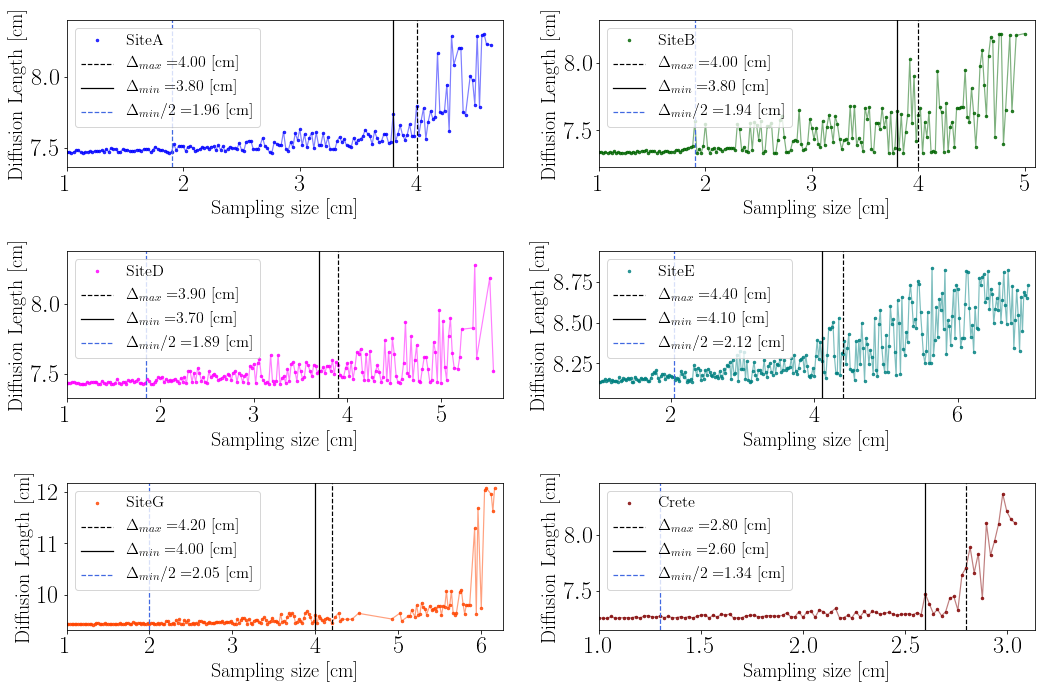

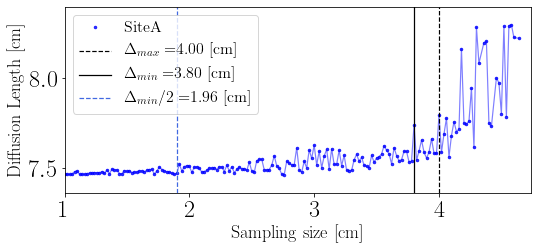

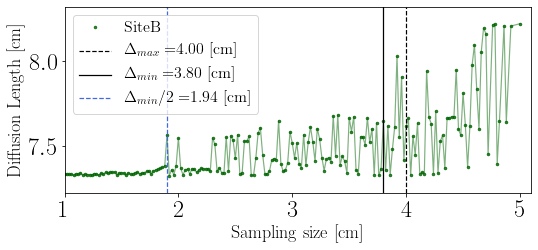

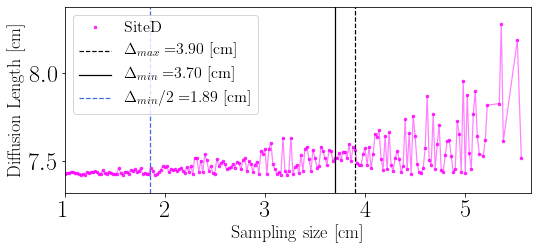

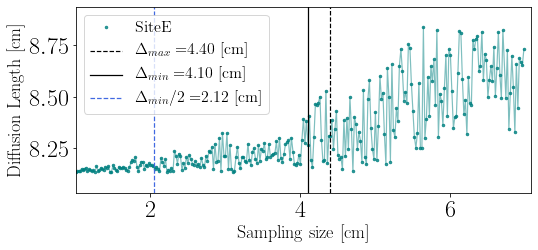

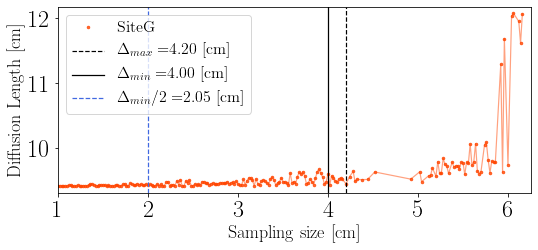

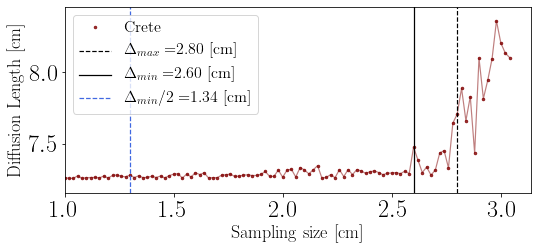

In [88]:
fig, axs = plt.subplots(int(np.ceil(len(sites)/2)),2, figsize=(15,10))
colors = ['blue','darkgreen','magenta','teal','orangered', 'maroon']

for i in range(len(sites)):
    site = sites[i]
    
    
    CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

    coreNames = CoresSpecs['CoreName']


    core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
    CoreSpecs = CoresSpecs.iloc[core_idx]

    DataAll = GetCoreData(site, 'Alphabet')

    data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]

    depth_LT = data_d18O_LT['depth']
    data_LT = data_d18O_LT['d18O']
    
    df_Site = pd.read_csv(pathResults + site + '_DiffLensVdelta_InterpAF_const.txt','\t')
    sigs = df_Site['diffLens']*100
    dels = df_Site['deltas']*100
    sigs0 = sigs[sigs>0]
    dels0 = dels[sigs>0]
    
    
    ax = axs.flatten()[i]
    
    ax.plot(dels[sigs>0], sigs[sigs>0], lw=1.2,marker='.', ls='None', ms=5, c=colors[i], alpha=0.8, label=site)
    ax.plot(dels[sigs>0], sigs[sigs>0], lw=1.2, c=colors[i], alpha=0.5)
    #ax.plot(dels,sigs, lw=1.2)
    ax.axvline(max(np.diff(depth_LT))*100, ls='--',c='k', lw=1.2, label='$\Delta_{max}=$'+f'{max(np.diff(depth_LT))*100:.2f} [cm]')
    #ax.axvline(min(np.diff(depth_LT))*100, ls='--',c='k', lw=1.2)
    ax.axvline(min(np.diff(depth_LT))*100, ls='-',c='k', lw=1.24, label='$\Delta_{min}=$'+f'{min(np.diff(depth_LT))*100:.2f} [cm]')
    ax.axvline(min(np.diff(depth_LT))/2*100, ls='--',c='royalblue', lw=1.24, label='$\Delta_{min}/2=$'+f'{np.mean(np.diff(depth_LT))/2*100:.2f} [cm]')
    ax.legend(fontsize=16, loc='upper left')
    ax.set(ylim=(min(sigs0)-0.1,max(sigs0)+0.1), xlim=(min(dels0),max(dels0)+0.1))
    ax.set_xlabel('Sampling size [cm]', fontsize=20)
    ax.set_ylabel('Diffusion Length [cm]', fontsize=20)#, xlim=(min(dels),0.055))
    
    fig1, ax1 = plt.subplots(figsize=(8,4))
    ax1.plot(dels[sigs>0], sigs[sigs>0], lw=1.2,marker='.', ls='None', ms=5, c=colors[i], alpha=0.8, label=site)
    ax1.plot(dels[sigs>0], sigs[sigs>0], lw=1.2, c=colors[i], alpha=0.5)
    ax1.axvline(max(np.diff(depth_LT))*100, ls='--',c='k', lw=1.2, label='$\Delta_{max}=$'+f'{max(np.diff(depth_LT))*100:.2f} [cm]')
    ax1.axvline(min(np.diff(depth_LT))*100, ls='-',c='k', lw=1.24, label='$\Delta_{min}=$'+f'{min(np.diff(depth_LT))*100:.2f} [cm]')
    ax1.axvline(min(np.diff(depth_LT))/2*100, ls='--',c='royalblue', lw=1.24, label='$\Delta_{min}/2=$'+f'{np.mean(np.diff(depth_LT))/2*100:.2f} [cm]')
    ax1.legend(fontsize=16, loc='upper left')
    ax1.set(ylim=(min(sigs0)-0.1,max(sigs0)+0.1), xlim=(min(dels0),max(dels0)+0.1))
    ax1.set_xlabel('Sampling size [cm]', fontsize=18)
    ax1.set_ylabel('Diffusion Length [cm]', fontsize=18)#, xlim=(min(dels),0.055))
    fig1.tight_layout()
    
    if saveFigs:
        fig1.savefig(pathFigures+site+'_InterpAF_deltaVSdiffLen_BD.pdf',bbox_inches='tight')
    
#    axs.flatten()[-1].plot(dels[sigs>0], sigs[sigs>0], lw=1.2,marker='.', ls='None', ms=5, c=colors[i], alpha=0.8, label=site)
    #axs.flatten()[-1].plot(dels[sigs>0], sigs[sigs>0], lw=1.2, c=colors[i], alpha=0.5)

#axs.flatten()[-1].set_xlabel('Sampling size [cm]', fontsize=20)
#axs.flatten()[-1].set_ylabel('Diffusion Length [cm]', fontsize=20)
#axs.flatten()[-1].legend(fontsize=16,loc='upper left', ncol=3)
fig.tight_layout()

In [89]:
if saveFigs:
        fig.savefig(pathFigures+'AllCores_InterpAF_deltaVSdiffLen_BD.pdf',bbox_inches='tight')

## Qualitatively, focus on specific resamplings

In [101]:
delta_arr_in = [0.005, 0.015,0.02,0.027]#, 0.044]#, 0.046]

site = 'Crete'
N_InInt = 33

print(f'\n {site}')
CoresSpecs = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Data/CoreSpecs.txt', ',')

coreNames = CoresSpecs['CoreName']


core_idx = coreNames[CoresSpecs['CoreName'] == site].index[0]
CoreSpecs = CoresSpecs.iloc[core_idx]
dTamb = CoreSpecs['dTamb']
dLaki = CoreSpecs['dLaki']
accum0 = CoreSpecs['Accum0']
accumIE = CoreSpecs['Accum1']
Temp0 = CoreSpecs['T0']

DataAll = GetCoreData(site, 'Alphabet')

data_d18O = DataAll[0]; data_d18O_LT = DataAll[1]
data_ECM = DataAll[2]; data_ECM_LT = DataAll[3]
data_dens = DataAll[4]; data_dens_LT = DataAll[5]
data_diff = DataAll[6]; data_diff_LT = DataAll[7]


depth = data_d18O['depth']
d18O = data_d18O['d18O']

depth_LT = data_d18O_LT['depth']
d18O_LT = data_d18O_LT['d18O']
isoData = data_d18O


delta_arr = delta_arr_in
diffLens = np.zeros(len(delta_arr))
depths = []
datas = []
peakss = []
troughss = []
patss = []

inst = BackDiffuse(site, data_d18O_LT, CoresSpecs, dTamb, dLaki, N_InInt, diffLenData=data_diff_LT[['Depth','sigma_o18']], densData=data_dens_LT)

for i in range(len(delta_arr)):

    print(f'\n\t\tRun {i} of {len(delta_arr)}')
    
    depth1, data, diffLen, Peaks, Ts, pats = inst.BackDiffused_constraints(interpAfterDecon=True, newDelta=delta_arr[i])
    depths.append(depth1)
    datas.append(data)
    peakss.append(Peaks)
    troughss.append(Ts)
    patss.append(pats)
    
    diffLens[i] = diffLen

#    except:
#        print('Error, moving on to next $\Delta$')
#        depths.append(np.zeros(len(depth1)))
#        datas.append(np.zeros(len(depth1)))
#        peakss.append(np.zeros(len(Peaks)))
#        troughss.append(np.zeros(len(Ts)))
#        diffLens[i] = -1
#        
#df_Site = pd.DataFrame({'diffLens':diffLens, 'deltas':delta_arr})



 Crete
No ECM file found, setting empty df instead

		Run 0 of 4
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0


<ipython-input-101-b42a4be7fe07>:20: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  DataAll = GetCoreData(site, 'Alphabet')


Final sigma: 7.26 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.005

		Run 1 of 4
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.28 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.015

		Run 2 of 4
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.26 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.020

		Run 3 of 4
ALT file exists. Loading ALT data.
Sigma fit: 7.46
Min sigma analyt: 7.28
Starting sigma: 5.28 [cm]
6.0
Final sigma: 7.31 [cm]
Final # of peaks: 33
Delta: 0.026
Delta new: 0.027


In [102]:
patss

[1.0, 1.0, 1.0, 1.0]

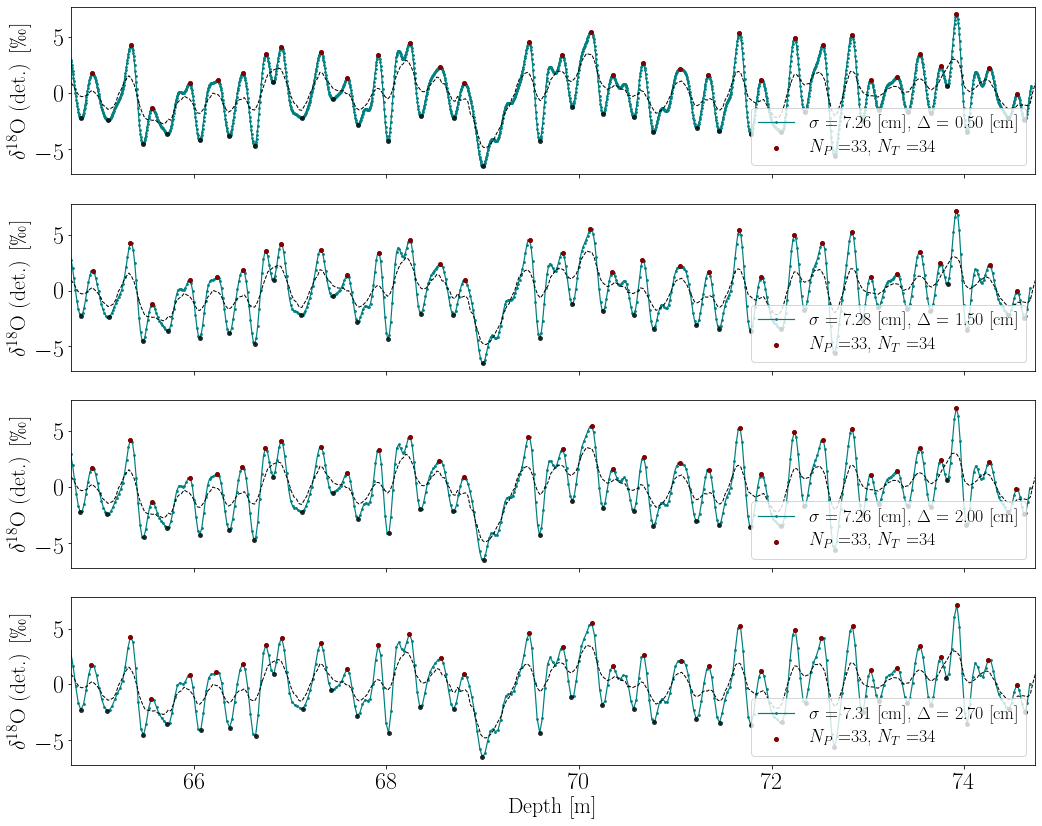

In [103]:
fig, ax = plt.subplots(len(delta_arr),1,figsize=(15,12), sharex=True)
for i in range(len(delta_arr)):
    depth = depths[i]
    data = datas[i]
    ax[i].plot(depth, data, lw=1.2, c='teal', marker='.', ms=3.5, label=f'$\sigma=$ {diffLens[i]*100:.2f} [cm], $\Delta=$ {delta_arr[i]*100:.2f} [cm]')
    ax[i].plot(depth_LT,d18O_LT-np.mean(d18O_LT), lw=1, ls='--', c='k')
    ax[i].plot(depth[peakss[i]],data[peakss[i]], ls='None', marker='.', c = 'maroon', ms=8, label=f'$N_P=${len(peakss[i])}, $N_T=${len(troughss[i])}')
    ax[i].plot(depth[troughss[i]],data[troughss[i]], ls='None', marker='.', c = 'k', alpha=0.7, ms=8)
    ax[i].set_ylabel('$\delta^{18}$O (det.) [$\permil$]', fontsize=22)
#    if patss[i] == 1.0:
#        ax[i].plot(depth[peakss[i]],data[peakss[i]], ls='None', marker='.', c = 'maroon', ms=8, label=f'$N_P=${len(peakss[i])}, $N_T=${len(troughss[i])}\n Pattern? Yes.')
#        ax[i].plot(depth[troughss[i]],data[troughss[i]], ls='None', marker='.', c = 'k', alpha=0.7, ms=8)
#    else:
#        ax[i].plot(depth[peakss[i]],data[peakss[i]], ls='None', marker='.', c = 'maroon', ms=8, label=f'$N_P=${len(peakss[i])}, $N_T=${len(troughss[i])}\n Pattern? No.')
#        ax[i].plot(depth[troughss[i]],data[troughss[i]], ls='None', marker='.', c = 'k', alpha=0.7, ms=8)
#        
    ax[i].legend(fontsize=18, loc='lower right')

ax[-1].set_xlabel('Depth [m]', fontsize=22)
ax[-1].set_ylabel('$\delta^{18}$O (det.) [$\permil$]', fontsize=22)
ax[-1].set(xlim=(min(depth_LT),max(depth_LT)),);
fig.tight_layout()

In [104]:
if saveFigs:
    fig.savefig(pathFigures+site+'_InterpAF_SpecificResampling_BD.pdf',bbox_inches='tight')

In [87]:
pathFigures

'/home/thea/MesterTesen/WrittenWork/Figures/'

# sigma_const vs. sigma(z)

# N Peaks vs. Diffusion Length

In [2]:
site = 'SiteG'

pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'
diffLens,N_Ps,N_Ts,patterns = np.asarray(pd.read_csv(pathResults + site+'diffLensVNpeaks_constrained.csv', ' ', header=None))

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


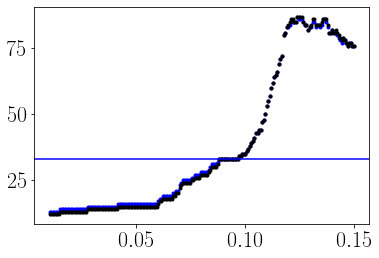

In [3]:
plt.plot(diffLens[patterns>0],N_Ts[patterns>0],'.',c='b')
plt.plot(diffLens[patterns>0],N_Ps[patterns>0],'.',c='k')
plt.axhline(33, c='b')
#plt.axvline(diffLen0_in)

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3331: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


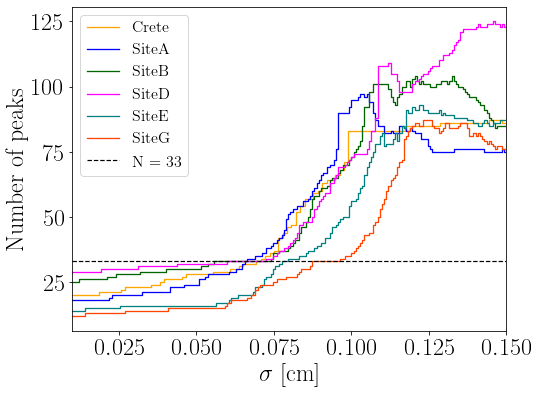

In [105]:
sites = ['Crete','SiteA','SiteB','SiteD','SiteE','SiteG']
colors = ['orange','blue','darkgreen','magenta','teal','orangered']

fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.set(xlim=(0.01,0.15), xlabel='$\sigma$ [cm]', ylabel='Number of peaks')
#ax[1].set(xlim=(0.01,0.15), xlabel='$\sigma$ [cm]', ylabel='Number of troughs')
i=0
for site in sites:
    if site=='Crete':
        diffLens,N_Ps,N_Ts,patterns = np.asarray(pd.read_csv(pathResults + site+'diffLensVNpeaks_constrainedTest.csv', ' ', header=None))
    else:
        diffLens,N_Ps,N_Ts,patterns = np.asarray(pd.read_csv(pathResults + site+'diffLensVNpeaks_constrained.csv', ' ', header=None))
            
    ax.step(diffLens[patterns>0],N_Ps[patterns>0], lw=1.3, label=site, color=colors[i])#,c='b')
    i+=1
    #ax.step(diffLens,N_Ps, lw=1.3, label=site)#,c='b')
    #ax[1].step(diffLens[patterns>0],N_Ts[patterns>0], lw=1.3, label=site)#,c='b')
    #plt.plot(diffLens[patterns>0],N_Ps[patterns>0],'.')#,c='k')
ax.axhline(33, lw=1.2,c='k',ls='--', label='N = 33')
#ax[1].axhline(33, lw=1.2,c='k',ls='--', label = 'N = 33')


ax.legend(fontsize=16)
fig.tight_layout()
#ax[1].legend(fontsize=16)
if saveFigs:
    fig.savefig(pathFigures+'AllCores_NpeaksVDiffLen.pdf',bbox_inches='tight')

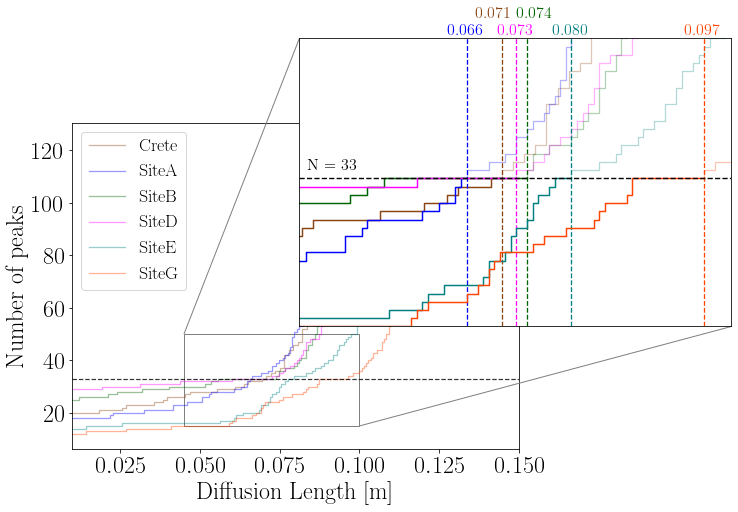

In [106]:
fig, ax = plt.subplots(figsize=(8,6))
plt.rcParams.update({'font.size': 22})
colors = ['saddlebrown','blue','darkgreen','magenta','teal','orangered']

for i in range(len(sites)):
    diffLens,N_Ps,N_Ts,patterns = np.asarray(pd.read_csv(pathResults + sites[i]+'diffLensVNpeaks_constrained.csv', ' ', header=None))
    ax.step(diffLens[patterns>0],N_Ps[patterns>0], lw=1.3, label=sites[i], c = colors[i], alpha=0.4)#,c='b')

ax.axhline(y=33,ls='--',color='k', lw=1.2, alpha=0.8)
ax.set(xlabel='Diffusion Length [m]', ylabel='Number of peaks', xlim=(0.01,0.15))
ax.legend(fontsize=18)



x1 = 0.045
x2 = 0.1
y1 = 15
y2 = 50


from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

axins = inset_axes(ax, 6,4, loc=2, bbox_to_anchor=(0.5,0.1,1,1), bbox_transform=ax.figure.transFigure)#loc=5) # zoom = 2
for i in range(len(sites)):
    diffLens,N_Ps,N_Ts,patterns = np.asarray(pd.read_csv(pathResults + sites[i]+'diffLensVNpeaks_constrained.csv', ' ', header=None))
    diffLensUse = diffLens[patterns>0]
    N_PsUse = N_Ps[patterns>0]
    sigMax = diffLensUse[N_PsUse <= 33][-1]
    
    axins.step(diffLensUse, N_PsUse, lw=1.3, label=site, alpha=0.3, c=colors[i])#,c='b')
    axins.step(diffLensUse[N_PsUse <= 33], N_PsUse[N_PsUse <= 33], lw=1.4, label=site, c=colors[i])#,c='b')
    axins.axvline(sigMax, c=colors[i], lw=1.3, ls='--')
    if i == 0:
        axins.text(sigMax-0.0035, y2+0.5+2.0, f'{sigMax:.3f}', c=colors[i], fontsize=16)
    elif i == 2:
        axins.text(sigMax-0.0015, y2+0.5+2.0, f'{sigMax:.3f}', c=colors[i], fontsize=16)
    else:
        axins.text(sigMax-0.0025, y2+0.5, f'{sigMax:.3f}', c=colors[i], fontsize=16)
axins.axes.xaxis.set_visible(False)
axins.axes.yaxis.set_visible(False)
axins.text(x1+0.001, 33+1,'N = 33', fontsize=16)

axins.axhline(y=33, ls='--', c='k', lw=1.4)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5");

if saveFigs:
    fig.savefig(pathFigures+'AllCores_NpeaksVDiffLen_wZoom.pdf',bbox_inches='tight')

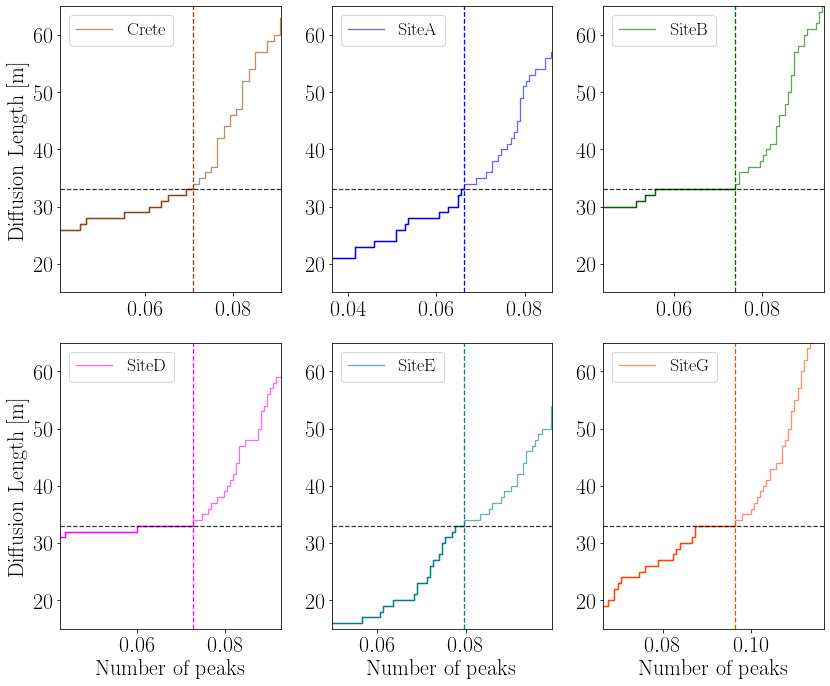

In [46]:
fig, axs = plt.subplots(2,3,figsize=(12,10))

for i, ax in zip(range(len(sites)), axs.flatten()):
    diffLens,N_Ps,N_Ts,patterns = np.asarray(pd.read_csv(pathResults + sites[i]+'diffLensVNpeaks_constrained.csv', ' ', header=None))
    diffLensUse = diffLens[patterns>0]
    N_PsUse = N_Ps[patterns>0]
    sigMax = diffLensUse[N_PsUse <= 33][-1]
    
    ax.step(diffLensUse, N_PsUse, lw=1.3, label=sites[i], alpha=0.6, c=colors[i])#,c='b')
    ax.step(diffLensUse[N_PsUse <= 33], N_PsUse[N_PsUse <= 33], lw=1.4, c=colors[i])#,c='b')
    ax.axvline(sigMax, c=colors[i], lw=1.3, ls='--')
    
    ax.axhline(y=33,ls='--',color='k', lw=1.2, alpha=0.8)
    ax.set(xlim=(sigMax-0.03,sigMax+0.02), ylim=(15,65))

    if i in [0,3]:
        ax.set_ylabel('Diffusion Length [m]')
    if i in [3,4,5]:
        ax.set_xlabel('Number of peaks')
    ax.legend(fontsize=18)

fig.tight_layout()

if saveFigs:
    fig.savefig(pathFigures+'AllCores_NpeaksVDiffLen_separate.pdf',bbox_inches='tight')

# Final sigma estimates, based on previous conclusions

### Theoretical diffusion length estimates plotted with optimal diffusion length estimate

In [74]:
pathResults = '/home/thea/MesterTesen/Analysis/ResultsGeneration/ResultsData/'
site = 'SiteB'
diffLens, dTambs, dLakis = np.array(pd.read_csv(pathResults + site+'_diffLens_GaussDistwDepths_sigNmonths2_NDCT2.csv', ' ', header=None))


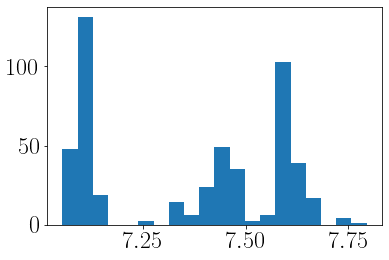

In [75]:
plt.hist(diffLens*100, bins=20);

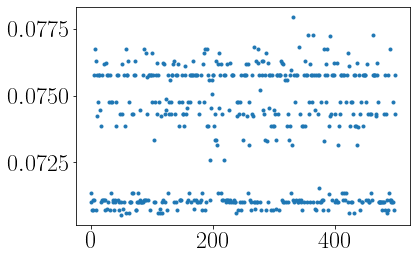

In [77]:
plt.plot(np.arange(len(diffLens)), diffLens,'.')